In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [158]:
data = pd.read_csv('Dataset.csv')

In [159]:
backup = data.copy()

In [160]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [162]:
data.drop(columns='Loan_ID', inplace=True)

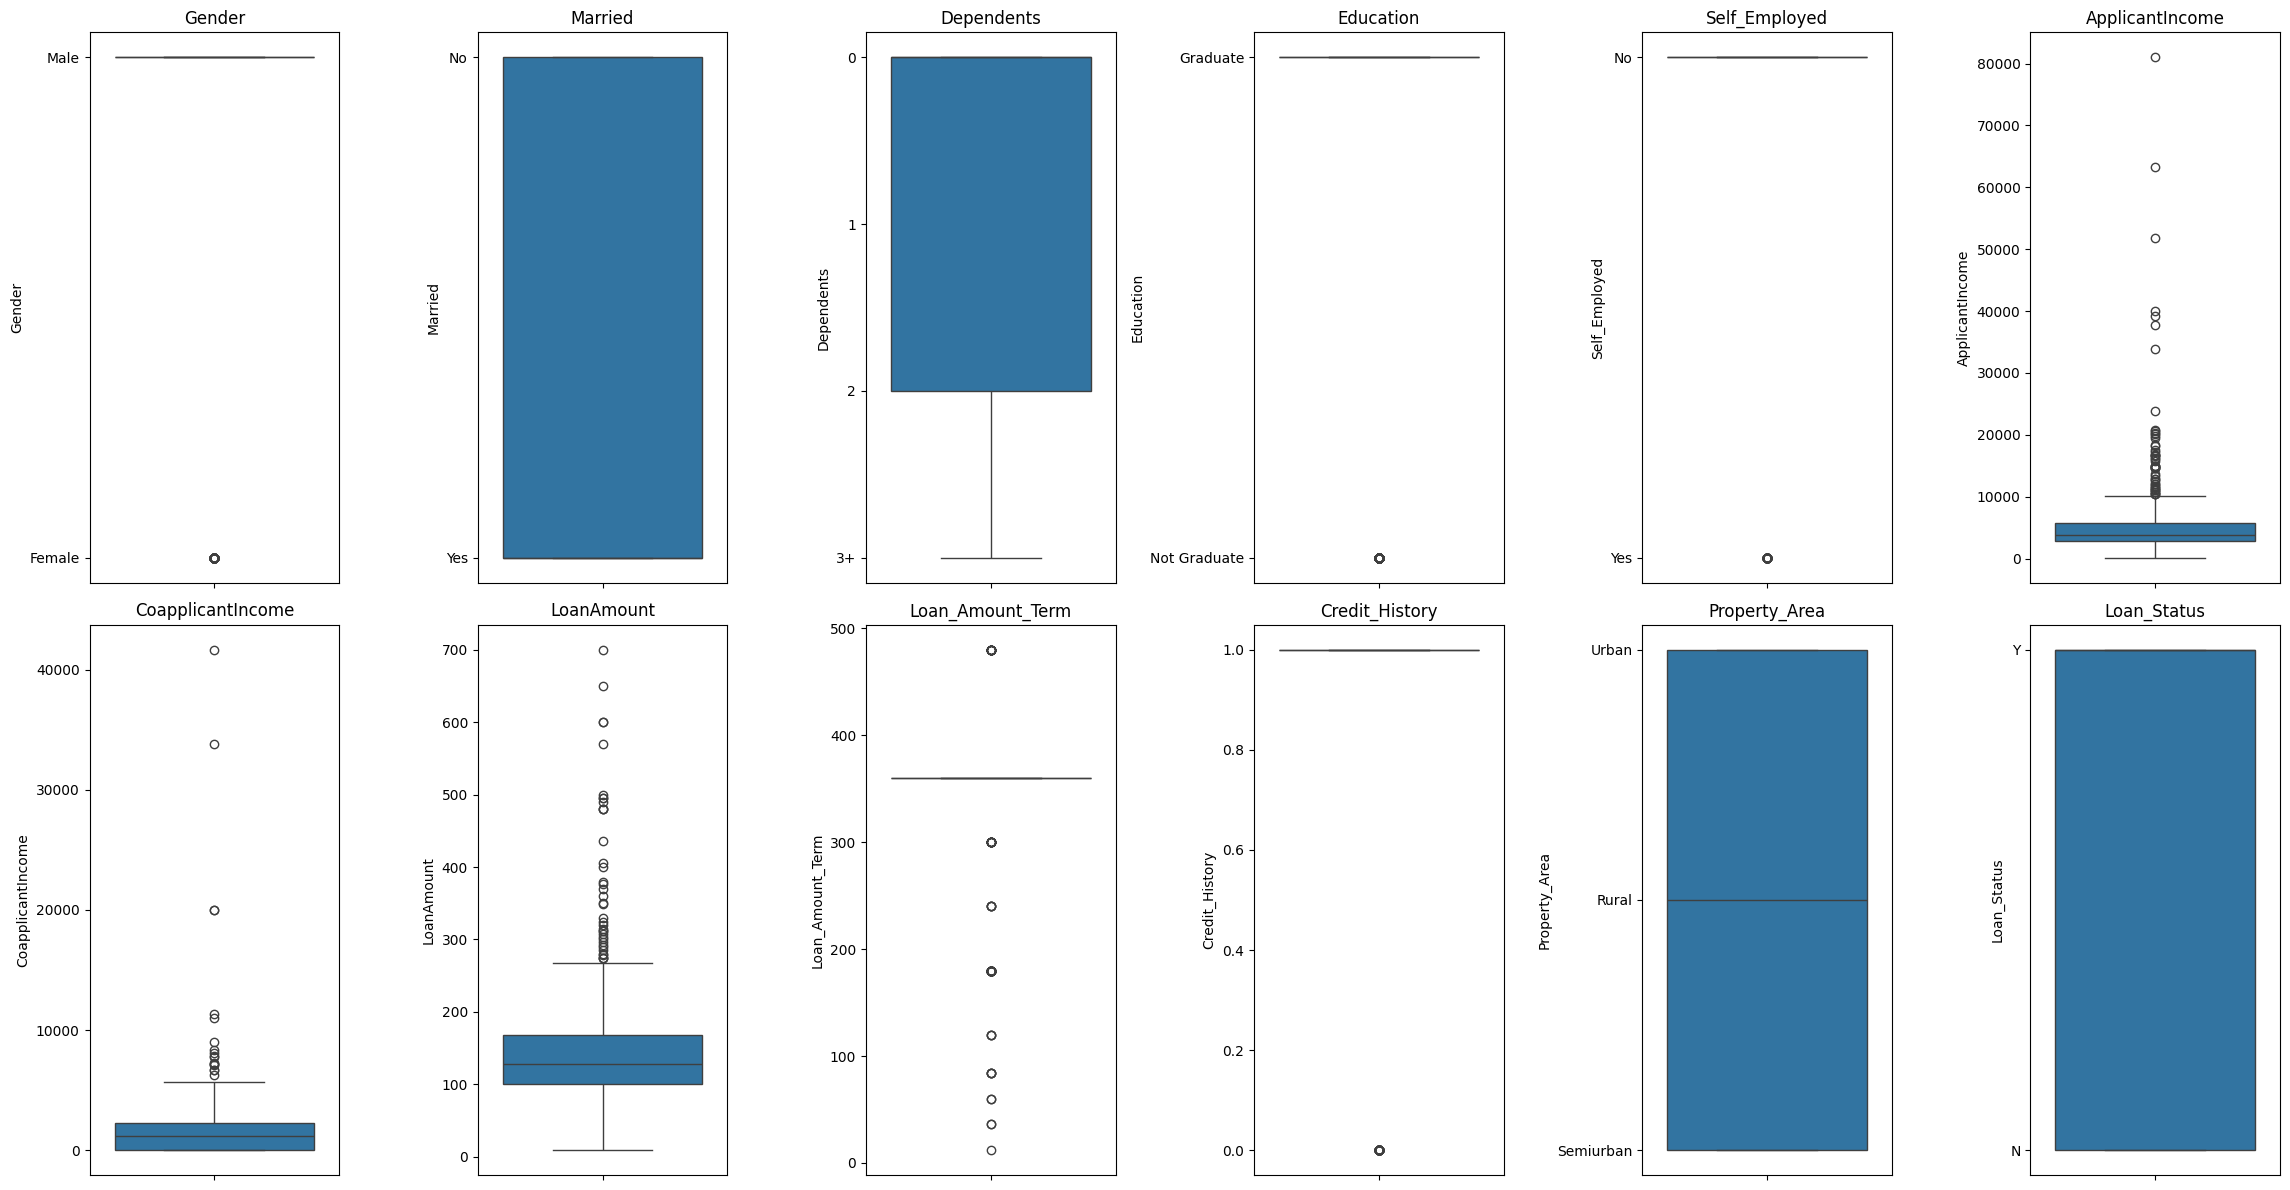

In [163]:
fig, ax = plt.subplots(ncols = 6, nrows = 2, figsize=[23,12])
ax= ax.flatten()
index=0

for col in data.columns:
    sns.boxplot(data[col], ax = ax[index])
    ax[index].set_title(col)
    index +=1

plt.tight_layout()

In [164]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### EDA Overview:
- Loan Id needs to be removed ( No use ) ✔️
- Null Values in Gender Column (Can use Mode/drop) ✔️
- Null Values in Married Column (Can use Mode/drop) ✔️
- Dependents has Null Values ✔️
- Dependents is object type and need to change to int (check unique values) ✔️
- Self_Employed contain Null Values ✔️
- Loan Amount contains Null Values ( Use Median -> Outliers ) ✔️
- Loan Amount Term contains Null Values ( Use Median -> Outliers ) ✔️
- Credit History contains Null Values ✔️
- Rename Column Names to better names ✔️

In [165]:
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [166]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])

In [167]:
data['Dependents']=data['Dependents'].str.replace('3+','3', regex=False)

In [168]:
data['Dependents'].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [169]:
data['Dependents']=data['Dependents'].fillna(np.mean([0,1,2,3]))

In [170]:
data['Dependents']=data['Dependents'].astype(int)

In [171]:
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [172]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())

In [173]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

In [174]:
data['Credit_History']=data['Credit_History'].mean()

In [175]:
data['Credit_History']=backup['Credit_History']

In [176]:
data['Credit_History']=data['Credit_History'].fillna(round(data['Credit_History'].mean()))

In [177]:
data['Credit_History'].unique()

array([1., 0.])

In [178]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [179]:
data.rename(
    columns={'ApplicantIncome':'Applicant_Income','CoapplicantIncome':'Coapplicant_Income',
            'Loan_Amount_Term':'LoanAmount_Term'}, inplace=True
)

In [180]:
data.rename(
    columns={'LoanAmount':'Loan_Amount',
            'Loan_AmountTerm':'Loan_Amount_Term'}, inplace=True
)

In [181]:
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,LoanAmount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              614 non-null    object 
 1   Married             614 non-null    object 
 2   Dependents          614 non-null    int64  
 3   Education           614 non-null    object 
 4   Self_Employed       614 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    float64
 8   LoanAmount_Term     614 non-null    float64
 9   Credit_History      614 non-null    float64
 10  Property_Area       614 non-null    object 
 11  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


In [183]:
data.to_csv('Cleaned_Dataset')

Number of people who took loan by Gender
Gender
Male      502
Female    112
Name: count, dtype: int64


Text(0.5, 1.0, 'Gender Comparison')

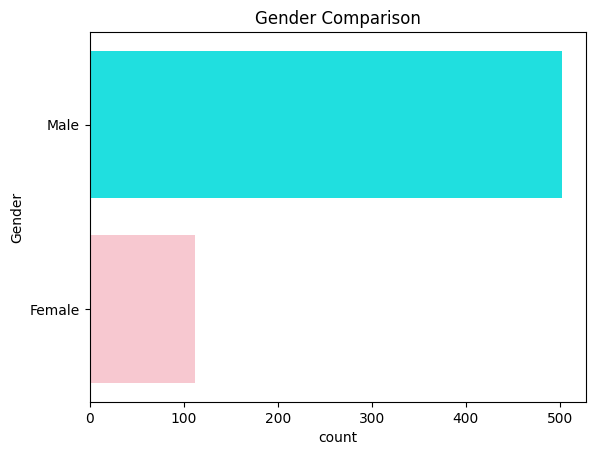

In [184]:
print("Number of people who took loan by Gender")
print(data['Gender'].value_counts())

sns.countplot(data['Gender'],palette=['aqua','pink'])
plt.title('Gender Comparison')

Number of Dapendants Vs Loan Approval 

Dependents  Loan_Status
0           N              107
            Y              238
1           N               42
            Y               75
2           N               25
            Y               76
3           N               18
            Y               33
dtype: int64


Text(0.5, 1.0, 'Number of Dapendants')

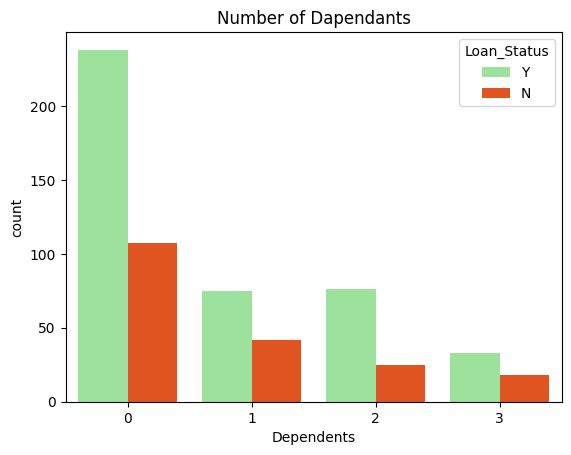

In [185]:
# print("Number of Dapendants ")
# print(data['Dependents'].value_counts())
# print(data.groupby('Dependents')['Loan_Status'].size())

print("Number of Dapendants Vs Loan Approval \n")
print(data.groupby(['Dependents','Loan_Status']).size())
sns.countplot(x=data['Dependents'], hue = data['Loan_Status'],palette=['lightgreen','orangered'])
plt.title('Number of Dapendants')

Text(0.5, 1.0, 'Income Vs Loan Ammount (Loan Status)')

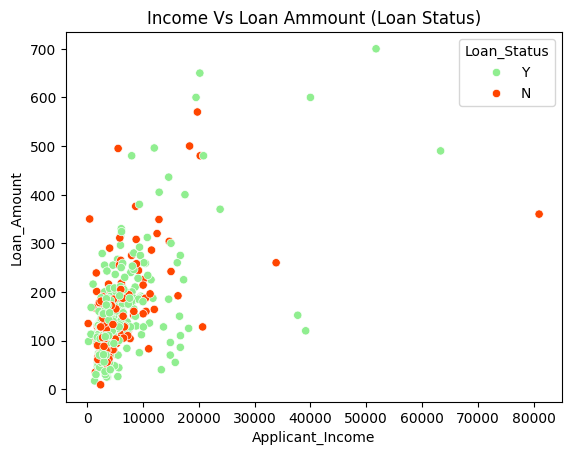

In [186]:

sns.scatterplot(x='Applicant_Income',y='Loan_Amount',data=data,hue='Loan_Status',
                palette=['lightgreen','orangered'])
plt.title('Income Vs Loan Ammount (Loan Status)')

Text(0.5, 1.0, 'Average Income of the Applicant Vs Loan Approval')

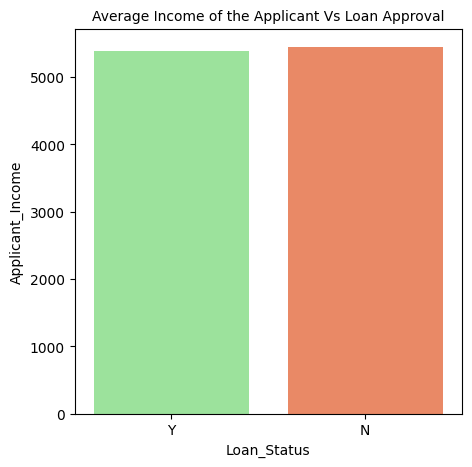

In [187]:
plt.figure(figsize=[5,5])
sns.barplot(x=data['Loan_Status'],y=data['Applicant_Income'],palette=['lightgreen','coral'],estimator=np.mean,ci=None)
plt.title('Average Income of the Applicant Vs Loan Approval', fontdict={'color':'black','fontsize':'10'})

In [188]:
data['Credit_History'].unique()

array([1., 0.])

Text(0.5, 1.0, 'Loan Approval based on Credit History')

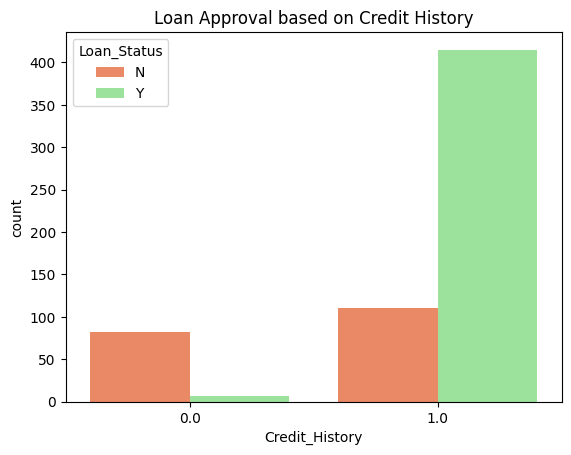

In [189]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=data, palette=['coral','lightgreen'] )
plt.title('Loan Approval based on Credit History')

Text(0.5, 1.0, 'Loan Approval based on Gender')

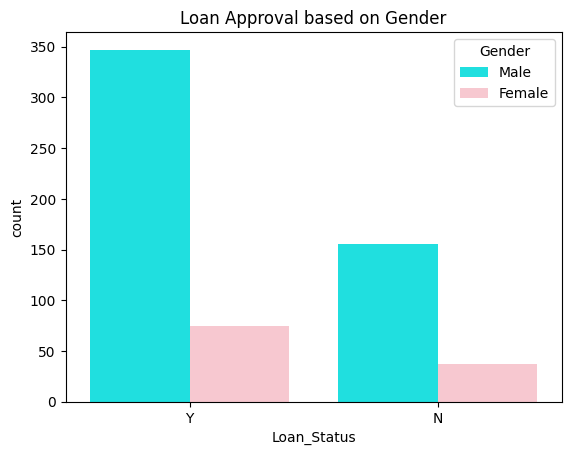

In [190]:
sns.countplot(x='Loan_Status',data=data, hue='Gender',palette=['aqua','pink'])
plt.title('Loan Approval based on Gender')

Gender  Loan_Status
Female  N               37
        Y               75
Male    N              155
        Y              347
dtype: int64


Text(0.5, 1.0, 'Loan Approval based on Gender')

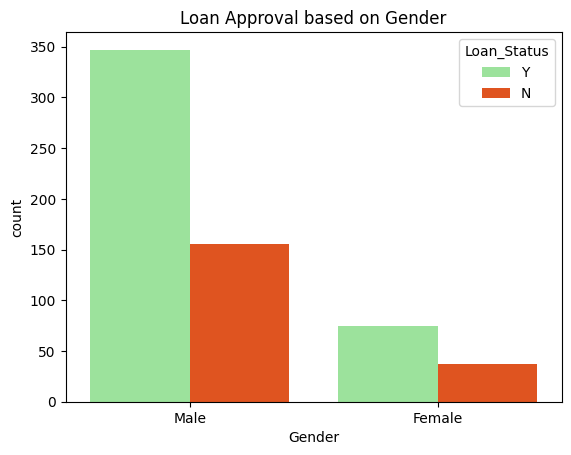

In [191]:
print(data.groupby(['Gender','Loan_Status']).size())

sns.countplot(x='Gender',data=data, hue='Loan_Status',palette=['lightgreen','orangered'])
plt.title('Loan Approval based on Gender')

<Axes: xlabel='LoanAmount_Term', ylabel='count'>

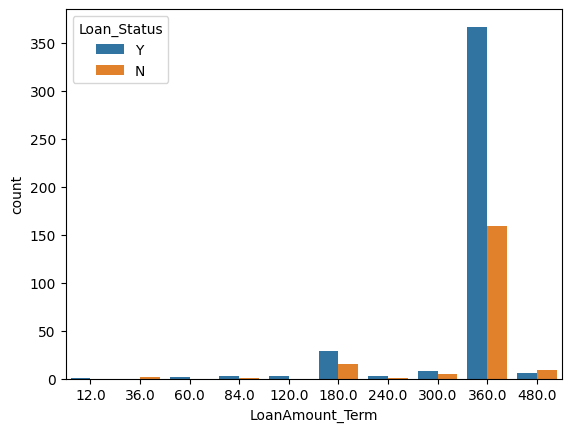

In [192]:
sns.countplot(x='LoanAmount_Term', data=data, hue='Loan_Status')

In [193]:
data.describe()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,LoanAmount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.768730,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.003387,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


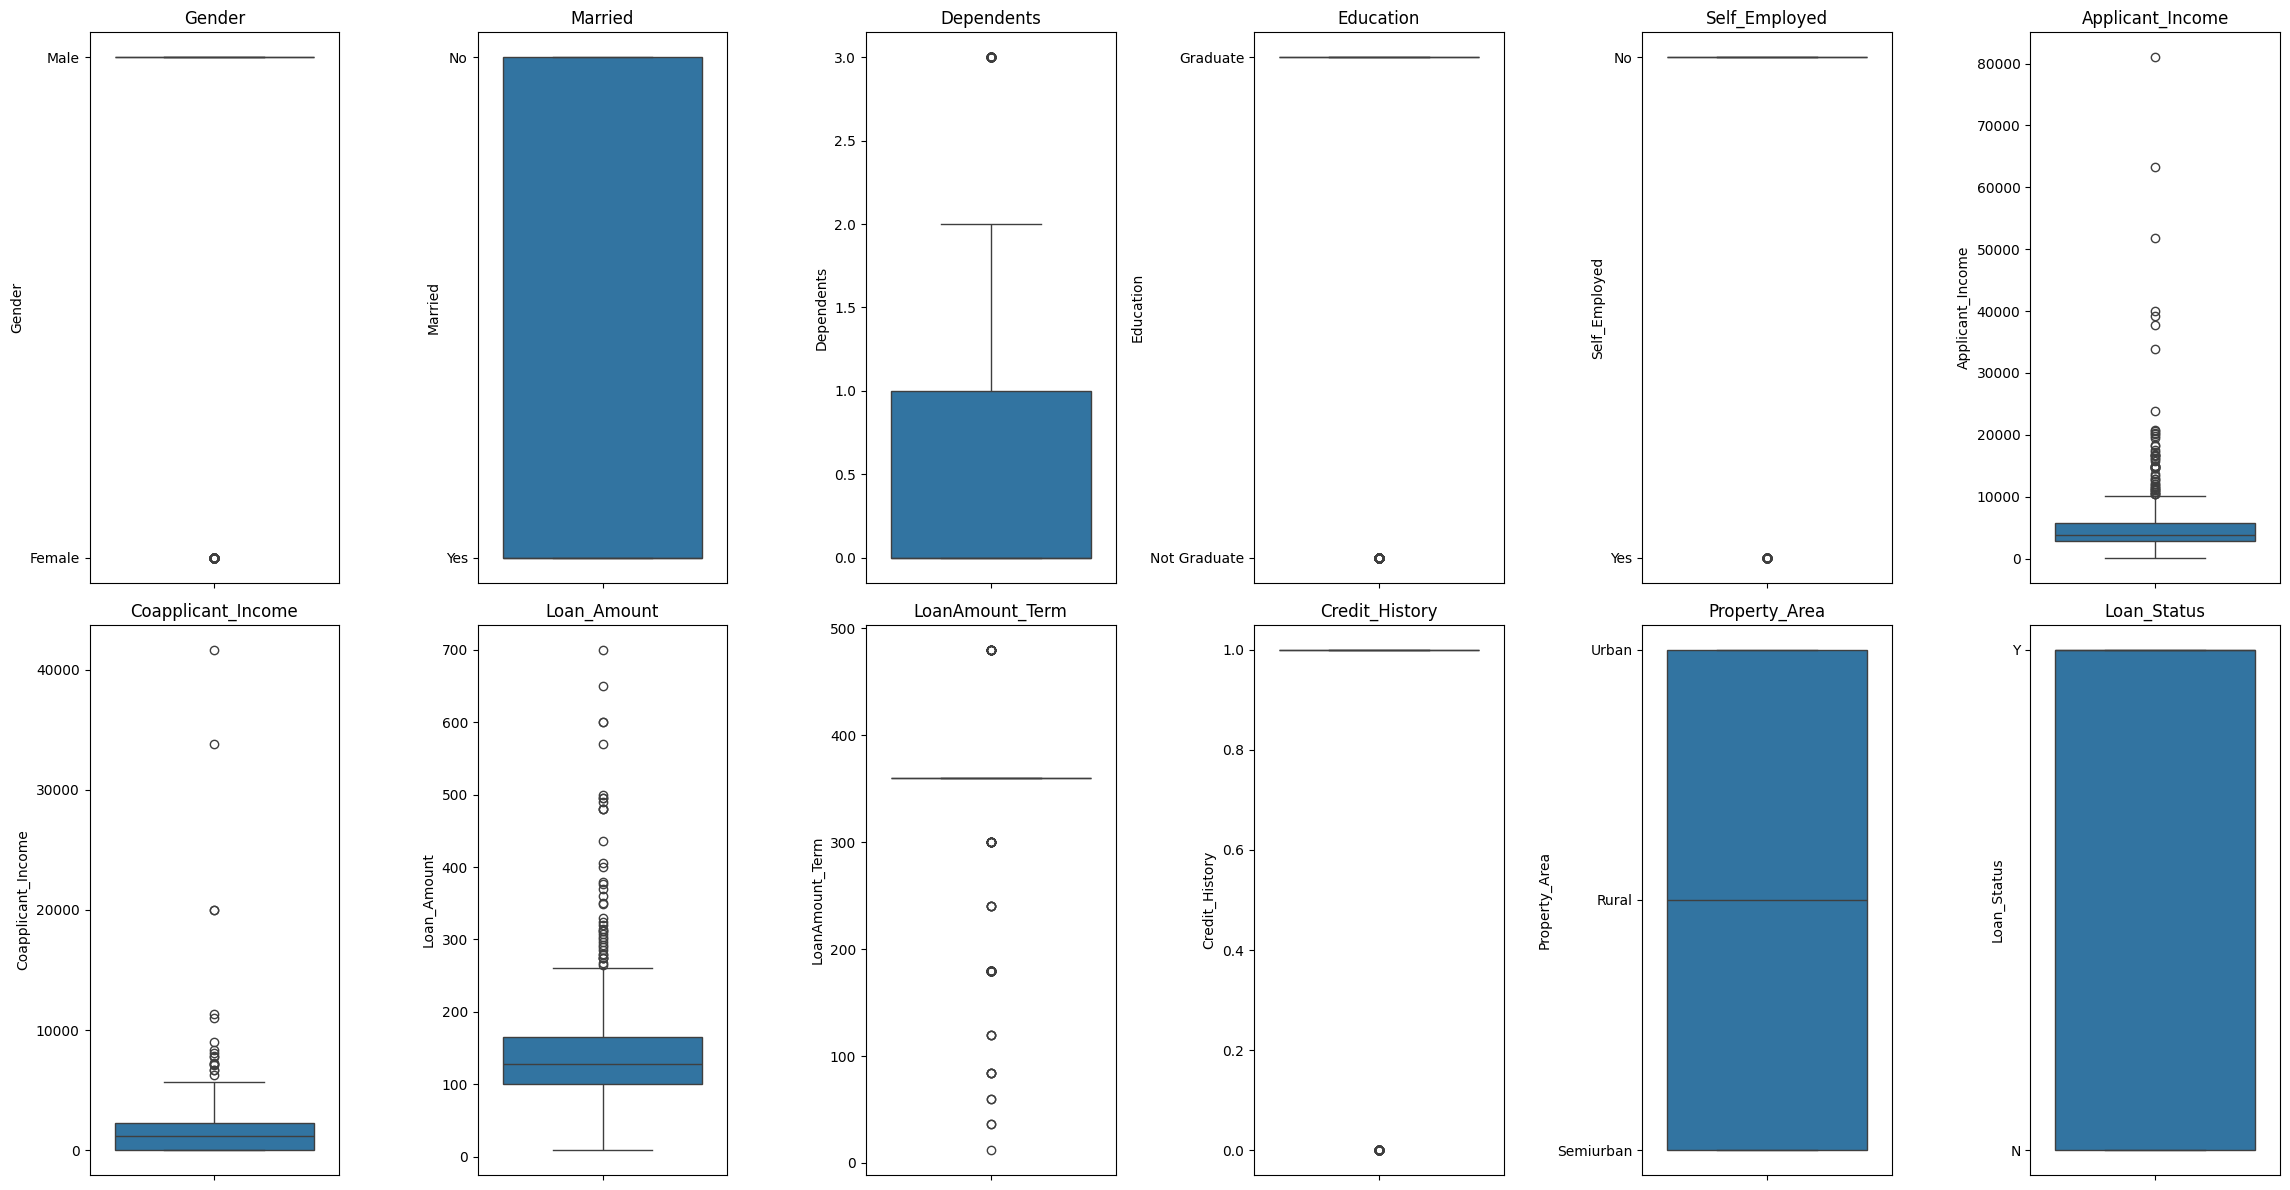

In [194]:
fig, ax = plt.subplots(ncols = 6, nrows = 2, figsize=[23,12])
ax= ax.flatten()
index=0

for col in data.columns:
    sns.boxplot(data[col], ax = ax[index])
    ax[index].set_title(col)
    index +=1

plt.tight_layout()

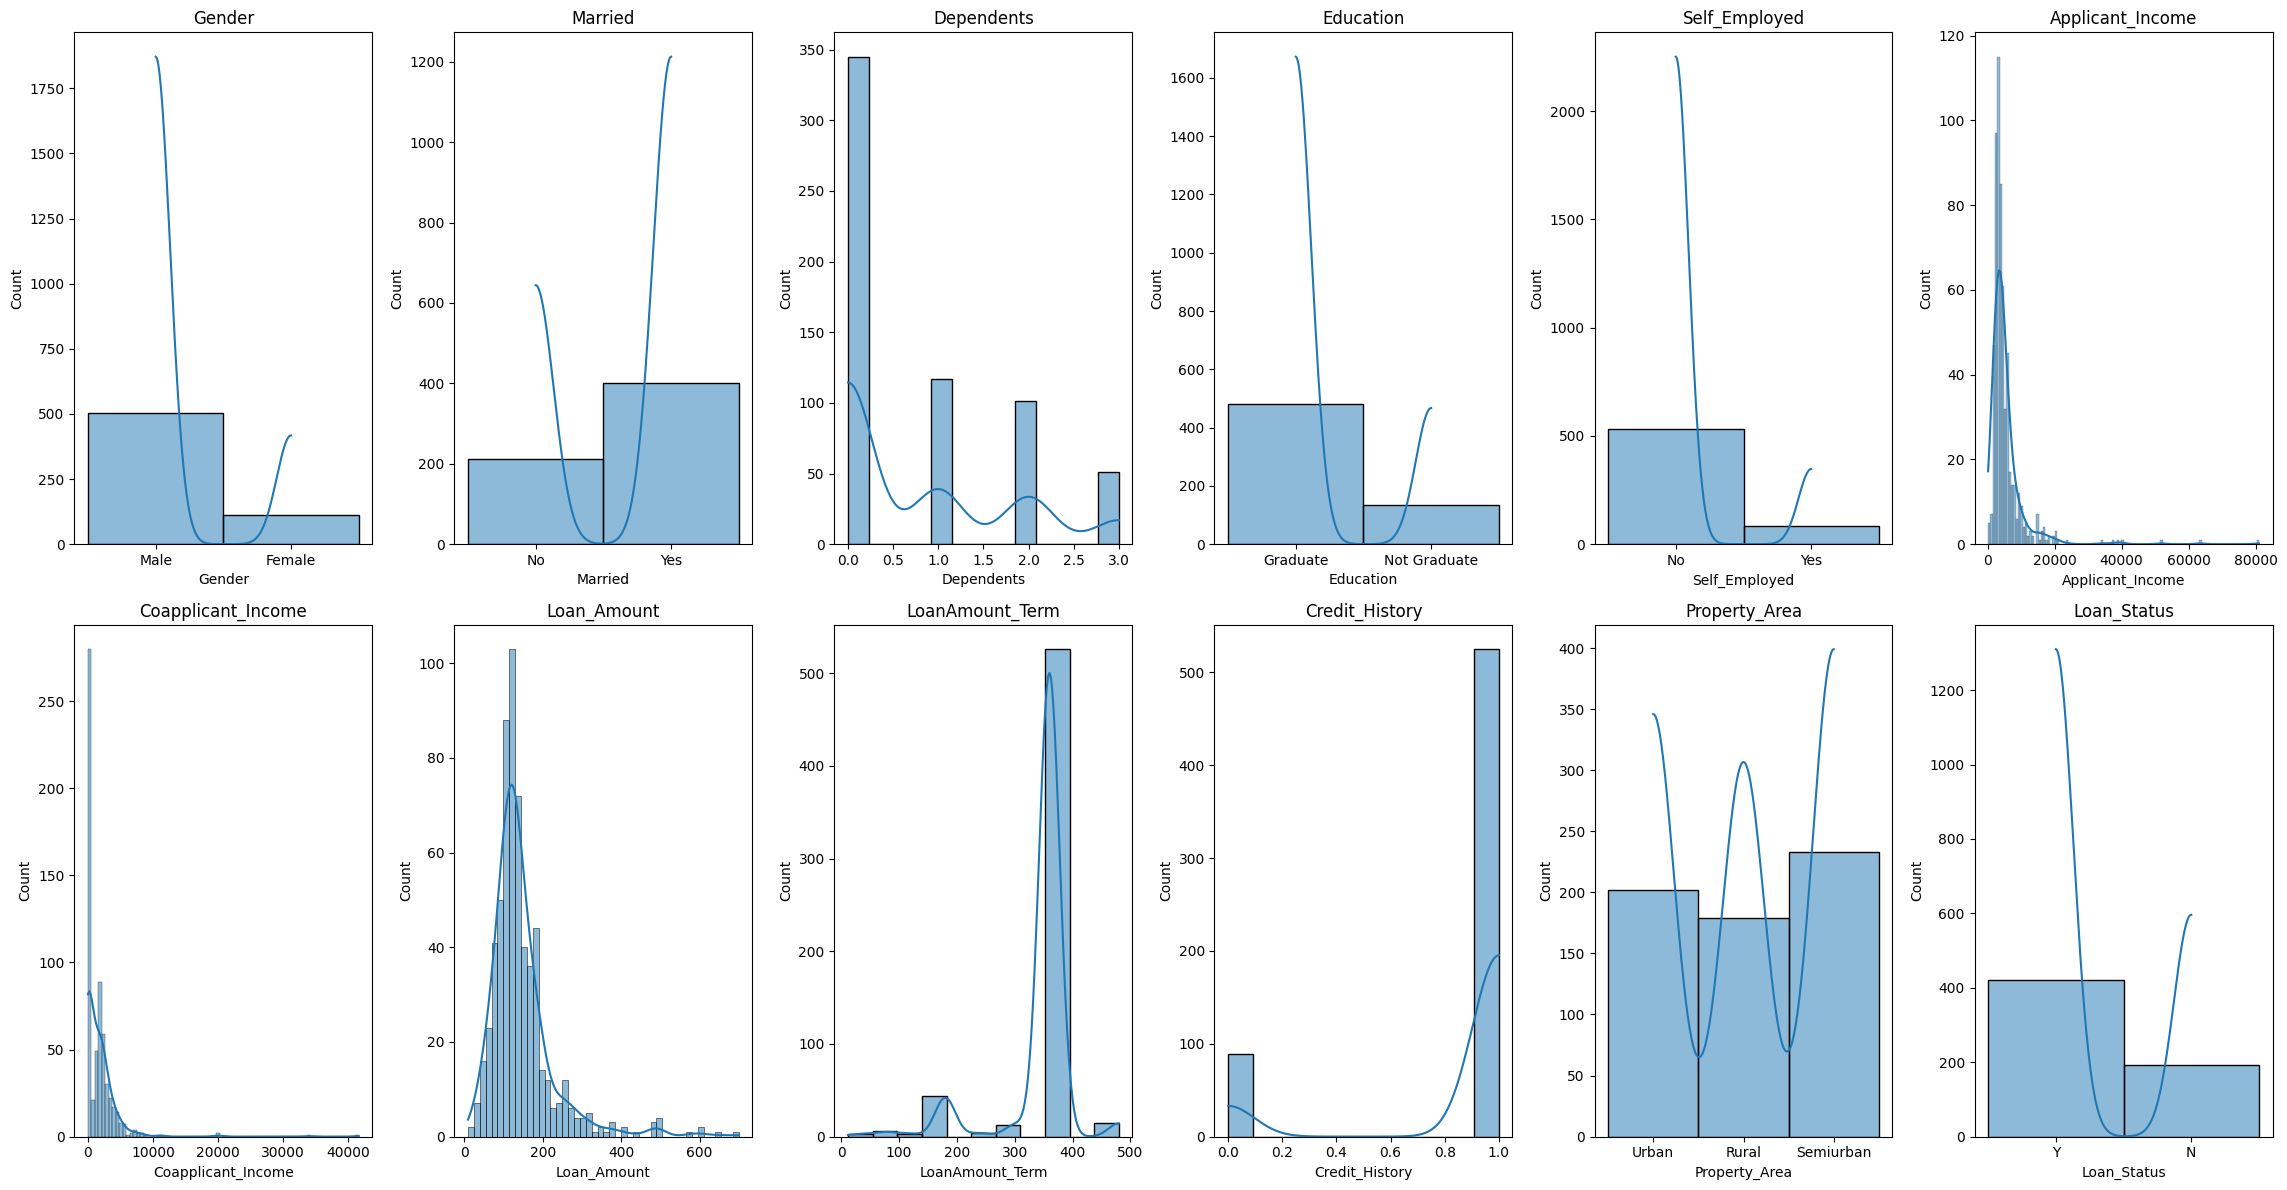

In [195]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=[23,12])
ax=ax.flatten()
index = 0

for col,value in data.items():
    sns.histplot(value, ax= ax[index], kde = True)
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

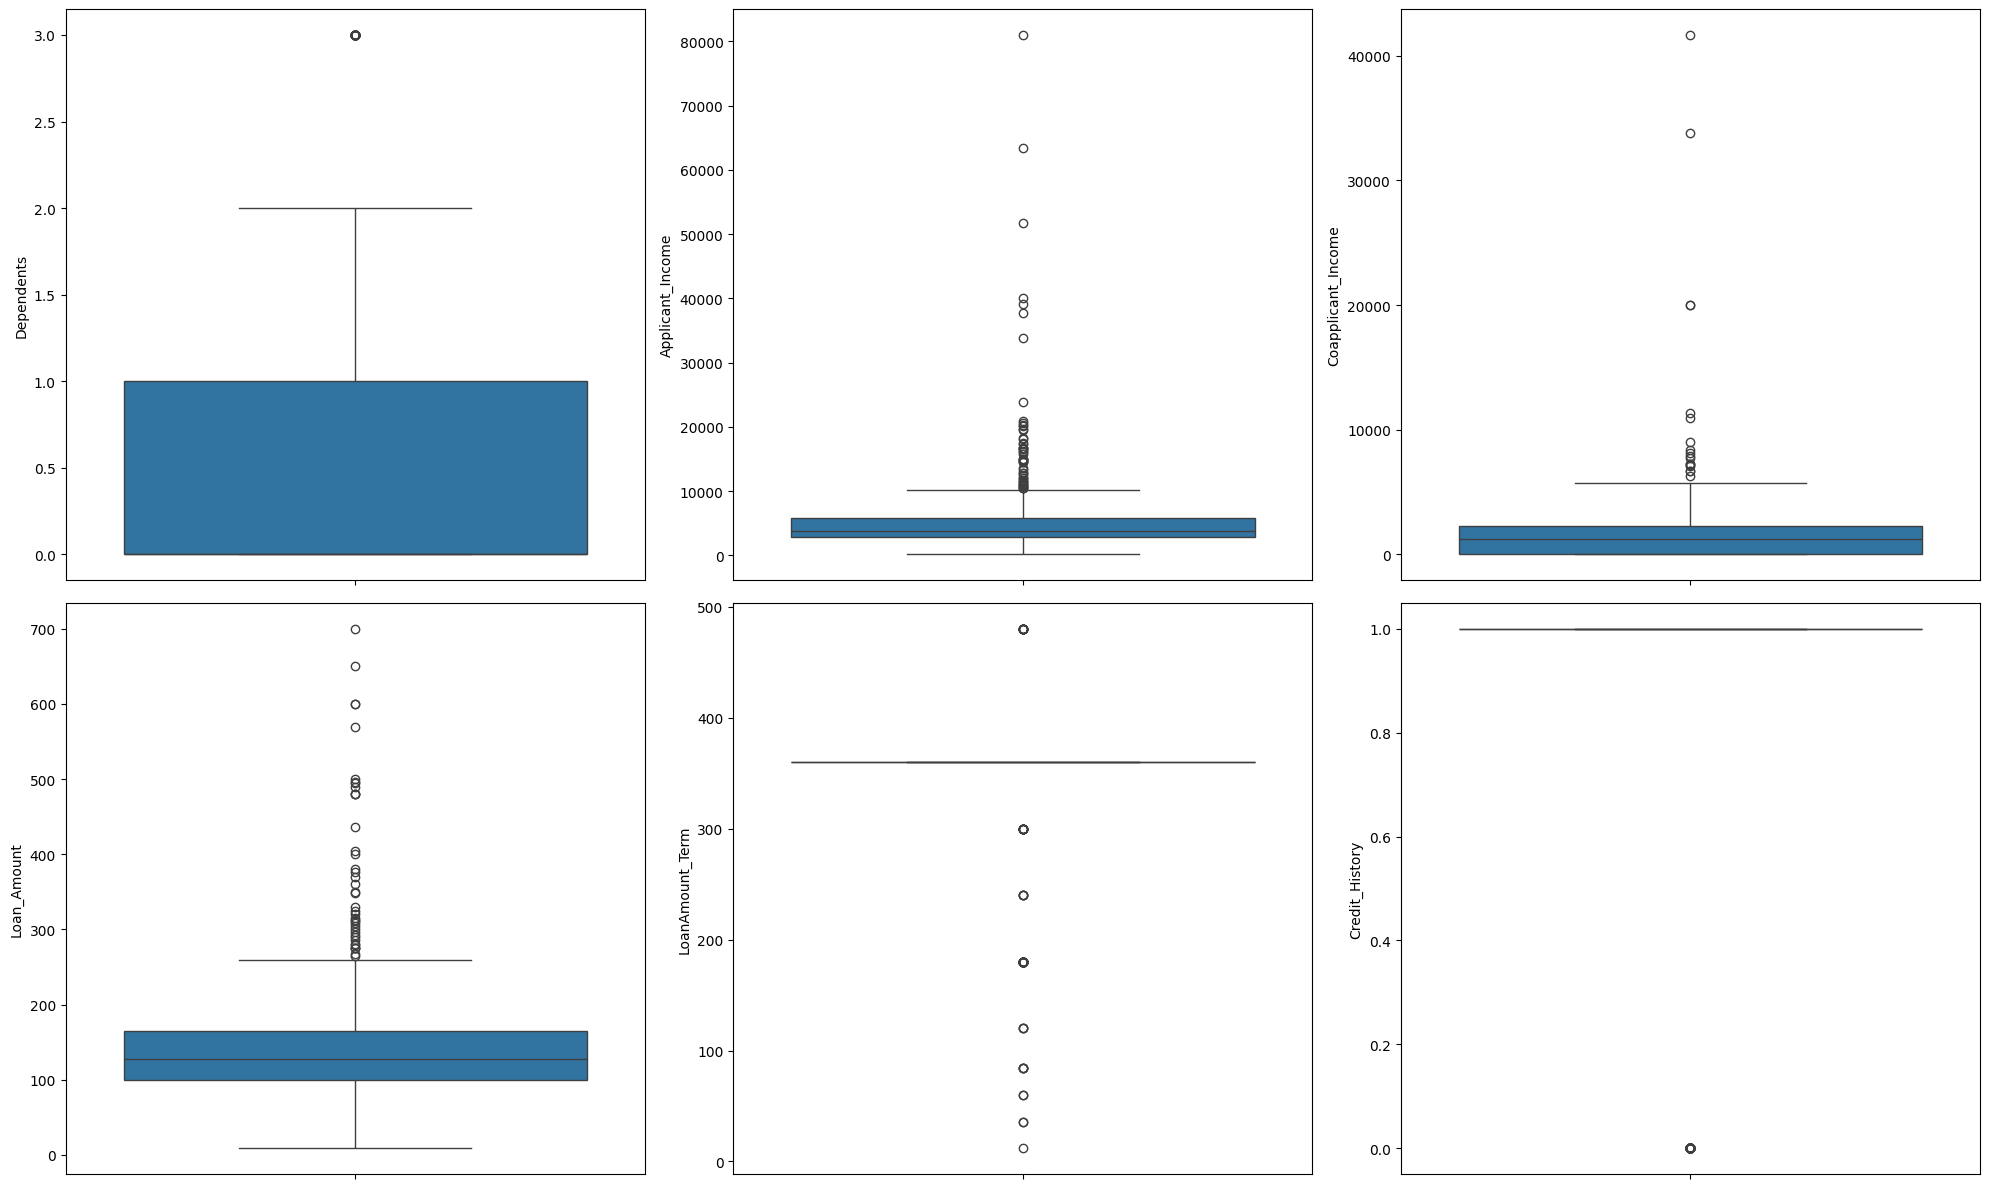

In [196]:
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize=[20,12])
ax= ax.flatten()
index=0
numeric_columns =(data.select_dtypes(include='number')).columns

for col in numeric_columns:
    sns.boxplot(data[col], ax = ax[index])
    index +=1

plt.tight_layout()

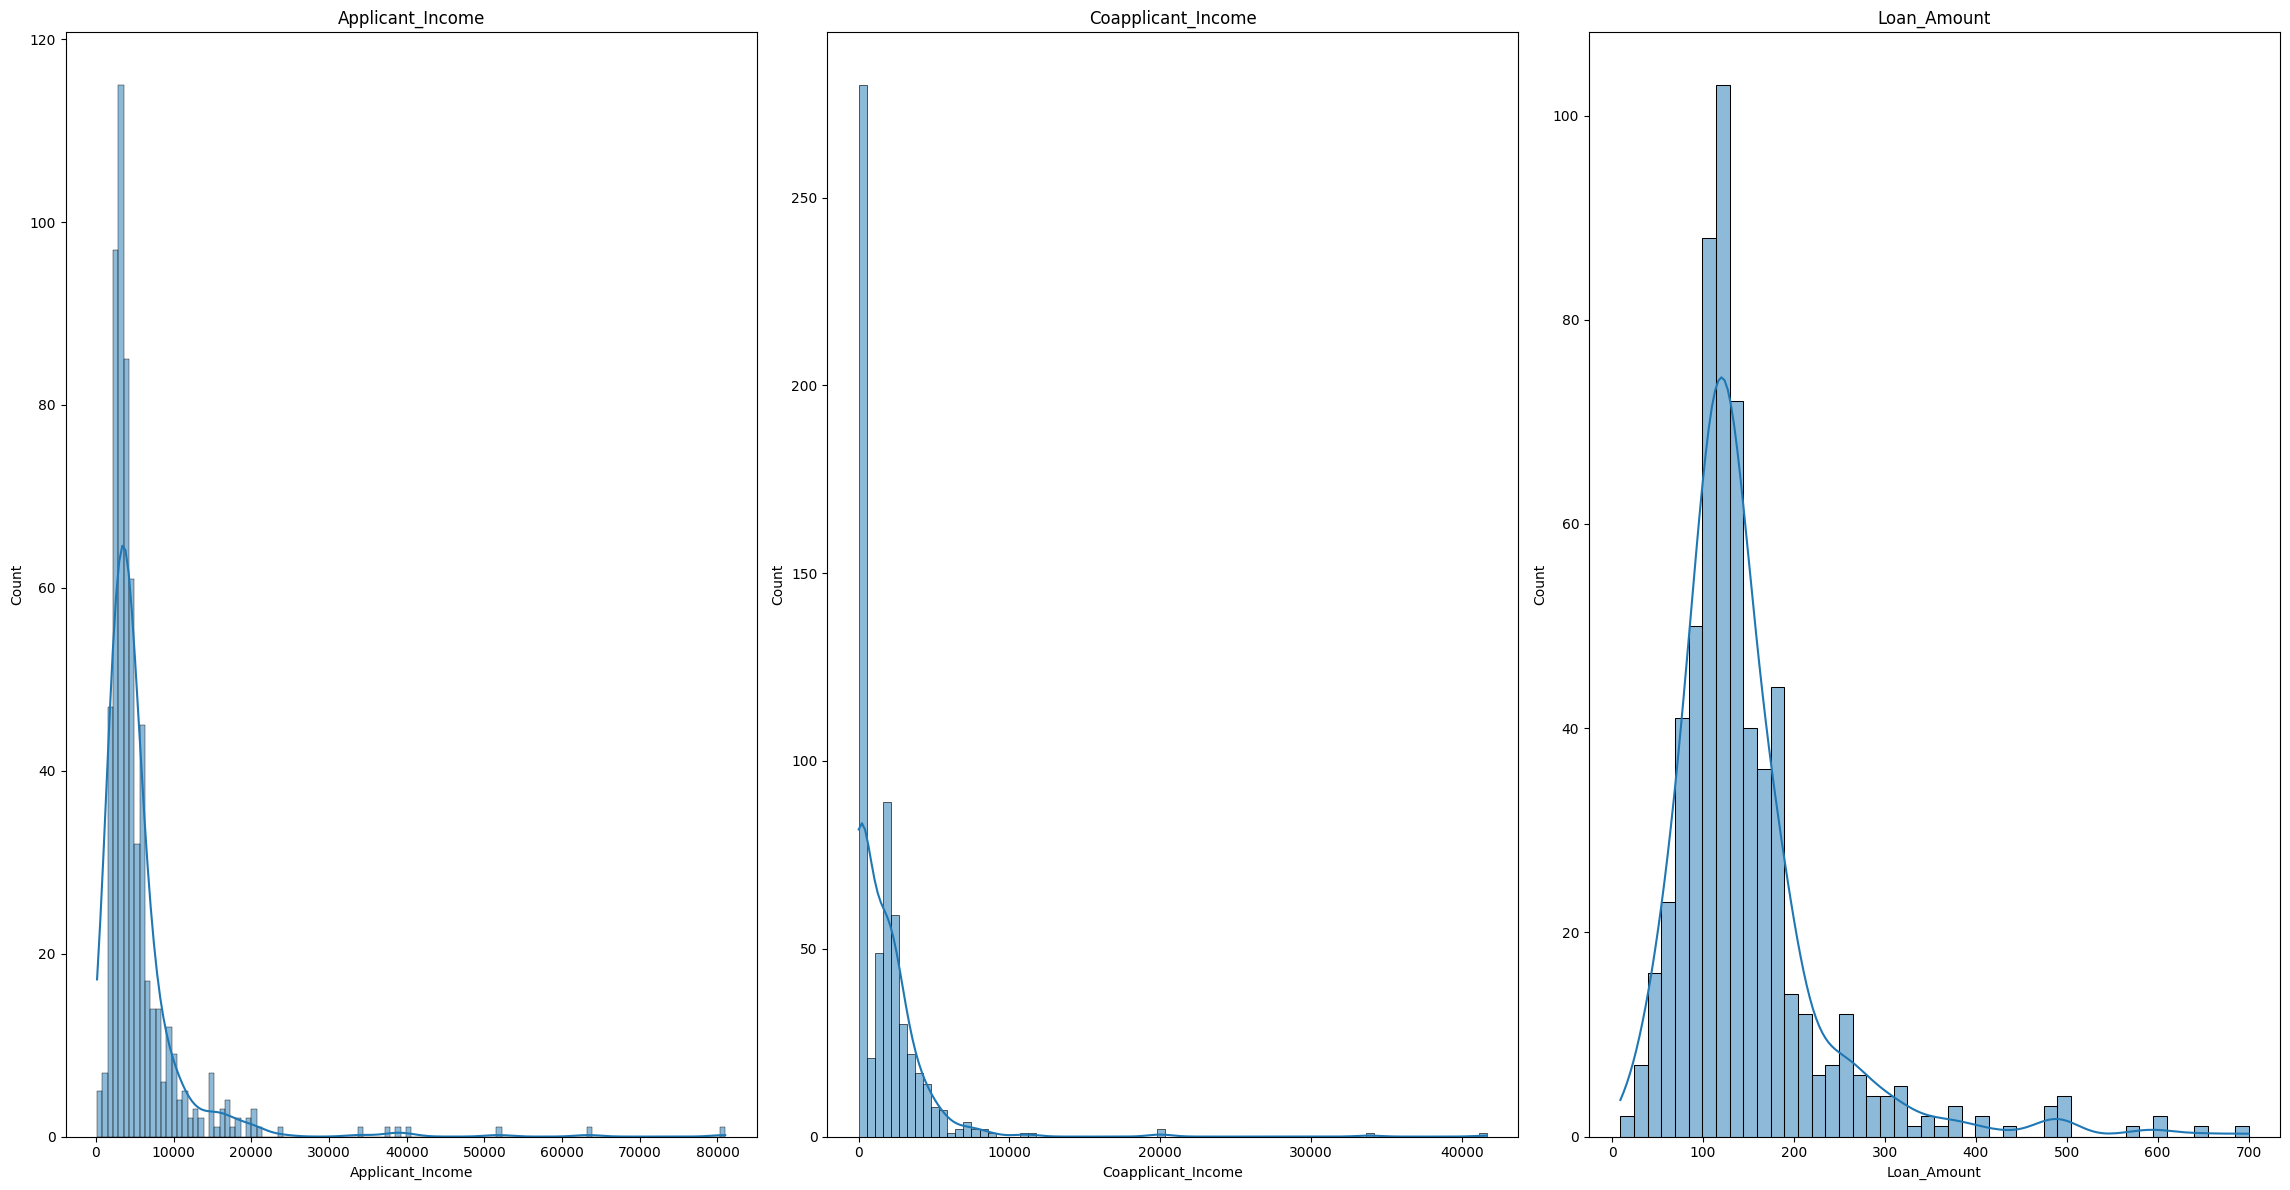

In [197]:
fig, ax = plt.subplots(ncols = 3, nrows=1, figsize = [23,12])
ax = ax.flatten()
index = 0
col_distplot = data[['Applicant_Income','Coapplicant_Income','Loan_Amount']]

for col,values in col_distplot.items():
    sns.histplot(values, ax=ax[index], kde=True)
    ax[index].set_title(col)
    index +=1

plt.tight_layout()

In [198]:
def IQR(data,columns):
    for col in columns:
        Q1 = np.percentile(data[col],25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col]>lower_bound)&(data[col]<upper_bound)]
    return data

In [199]:
data.describe()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,LoanAmount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.768730,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.003387,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [200]:
data_no_outlier = IQR(data,['Applicant_Income','Coapplicant_Income','Loan_Amount'])

In [201]:
data_no_outlier.describe()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,LoanAmount_Term,Credit_History
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,0.732692,3995.719231,1317.578692,123.651923,342.576923,0.851923
std,0.983333,1794.687196,1397.402837,39.749892,65.618547,0.355518
min,0.000000,150.000000,0.000000,25.000000,12.000000,0.000000
25%,0.000000,2724.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3590.500000,1293.500000,123.000000,360.000000,1.000000
75%,1.000000,4772.750000,2191.000000,150.000000,360.000000,1.000000
max,3.000000,10047.000000,5701.000000,236.000000,480.000000,1.000000


In [202]:
data_no_outlier['LoanAmount_Term'].value_counts()

LoanAmount_Term
360.0    445
180.0     36
480.0     14
300.0     10
240.0      4
84.0       4
60.0       2
120.0      2
36.0       2
12.0       1
Name: count, dtype: int64

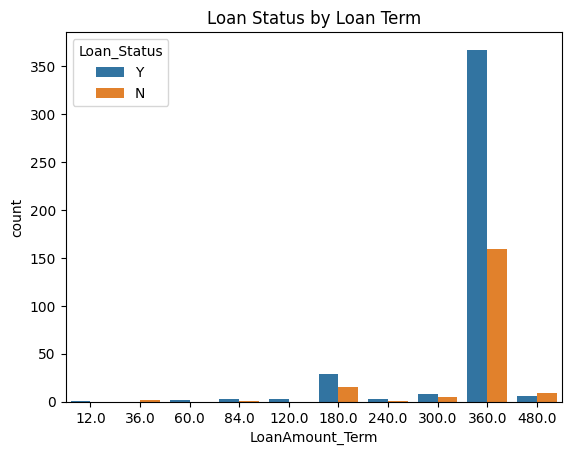

In [203]:
sns.countplot(x='LoanAmount_Term', hue='Loan_Status', data=data)
plt.title("Loan Status by Loan Term")
plt.show()

##### Let's convert this column to categorical and divivde the terms into 3 categoris -- short, medium and, long

In [204]:
data_no_outlier['LoanAmount_Term'].value_counts()

LoanAmount_Term
360.0    445
180.0     36
480.0     14
300.0     10
240.0      4
84.0       4
60.0       2
120.0      2
36.0       2
12.0       1
Name: count, dtype: int64

In [205]:
def convert_to_cat(term):
    if term >= 360:
        return 'Long'
    elif term >=180 and term < 360:
        return "Medium"
    else:
        return 'Short'
    
data_no_outlier['LoanAmount_Term_Categ']=data_no_outlier['LoanAmount_Term'].apply(convert_to_cat) 
        

In [206]:
data_no_outlier['LoanAmount_Term_Categ'].value_counts()

LoanAmount_Term_Categ
Long      459
Medium     50
Short      11
Name: count, dtype: int64

In [207]:
data_no_outlier.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,LoanAmount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Term_Categ
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,Long
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Long
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Long
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Long
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Long


In [208]:
data_no_outlier.drop(columns='LoanAmount_Term',inplace=True)

In [209]:
data_no_outlier.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History,Property_Area,Loan_Status,LoanAmount_Term_Categ
0,Male,No,0,Graduate,No,5849,0.0,128.0,1.0,Urban,Y,Long
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N,Long
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y,Long
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y,Long
4,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y,Long


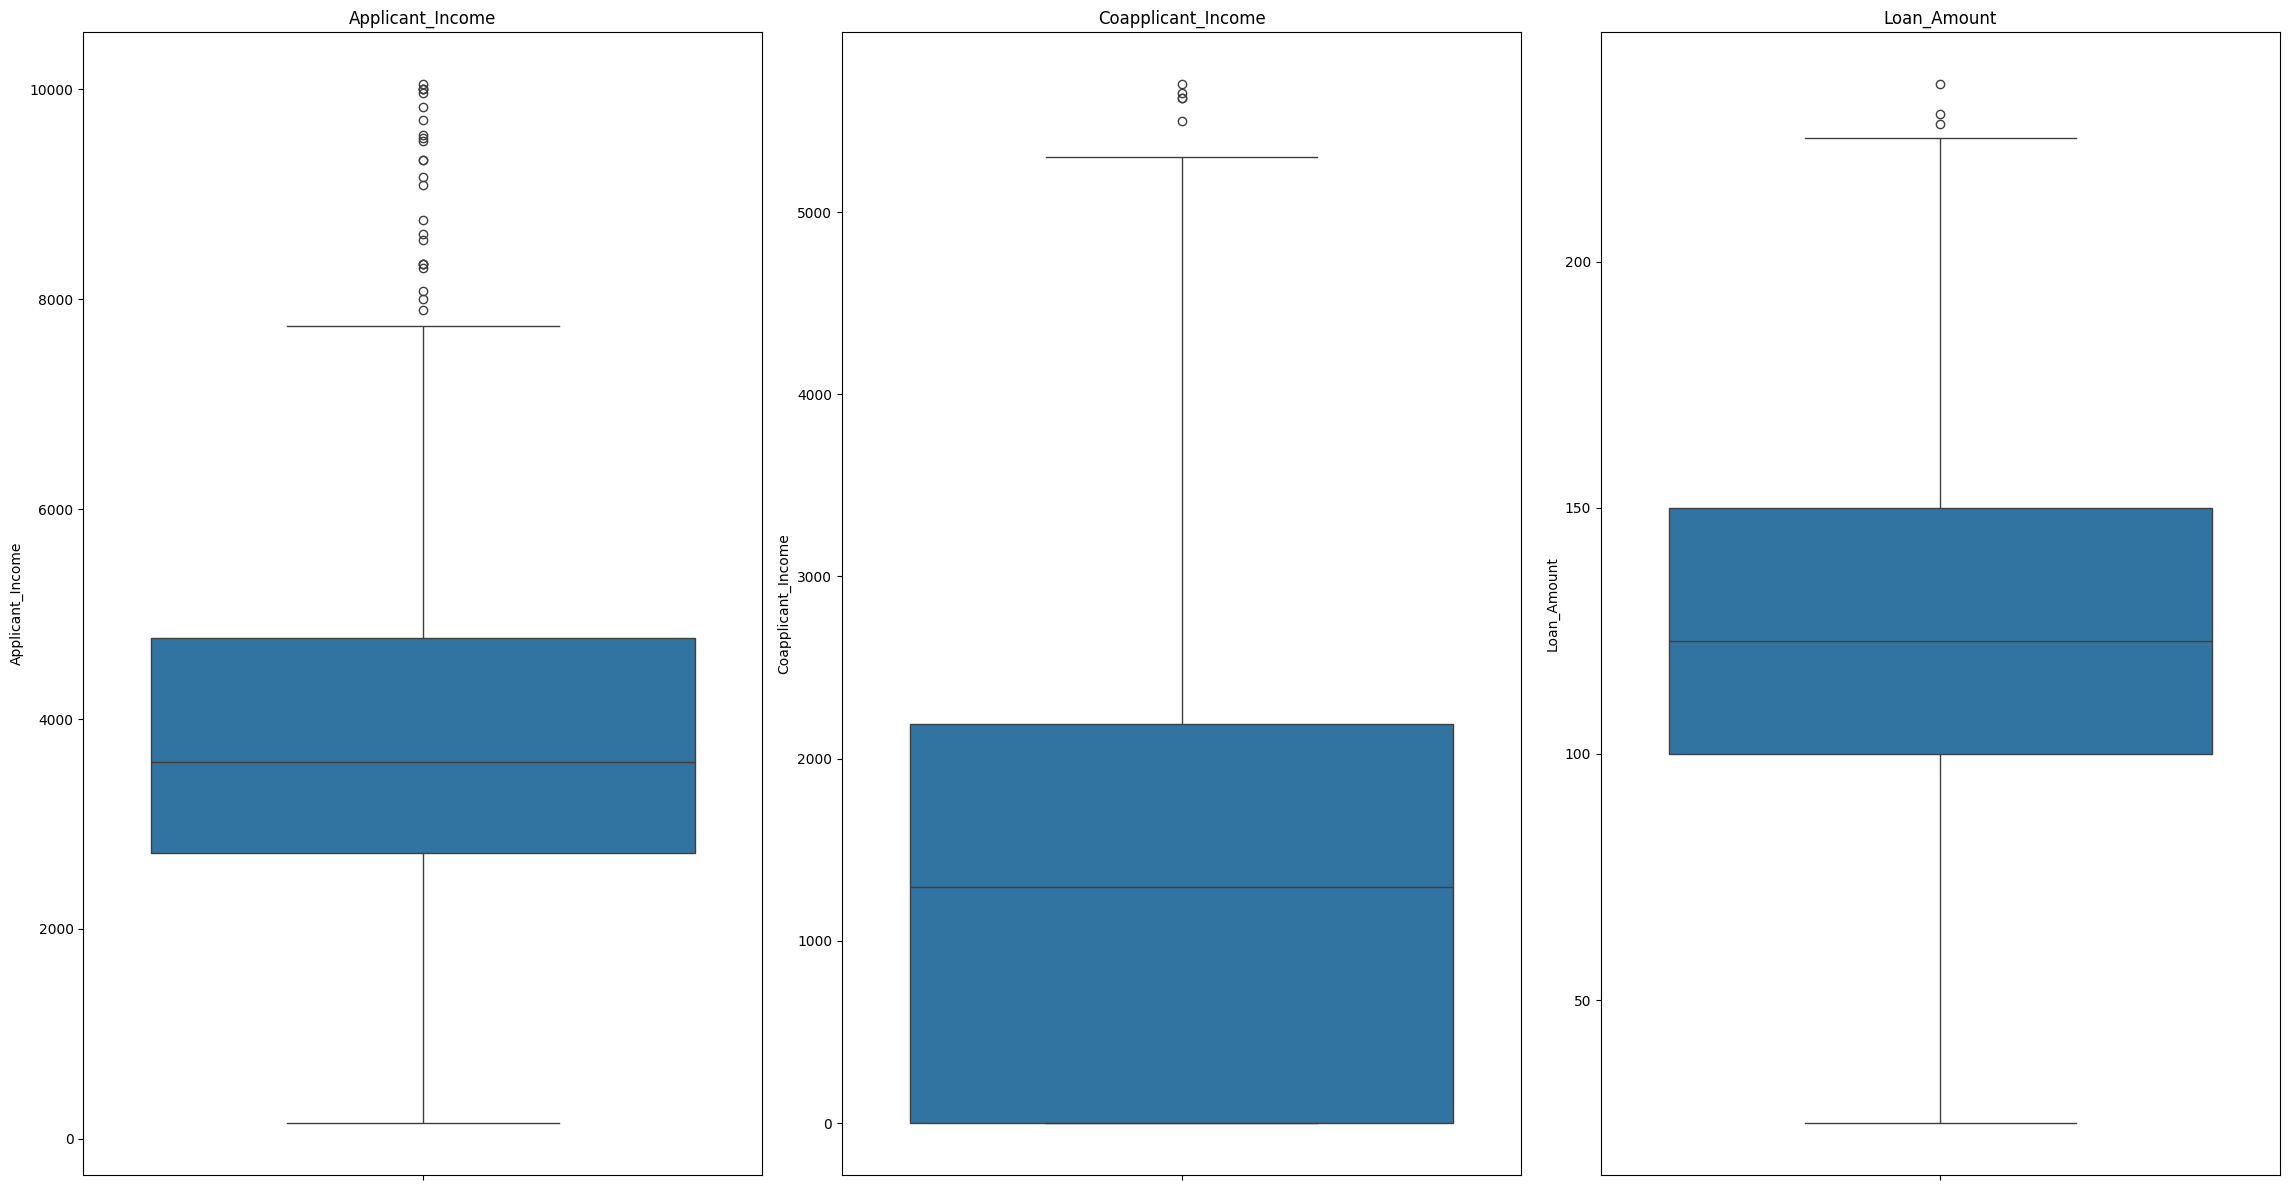

In [210]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=[23,12])
ax=ax.flatten()
index=0
outlier_col = data[['Applicant_Income','Coapplicant_Income','Loan_Amount']]

for col in outlier_col.columns:
    sns.boxplot(data_no_outlier[col], ax=ax[index])
    ax[index].set_title(col)
    index+=1

plt.tight_layout()

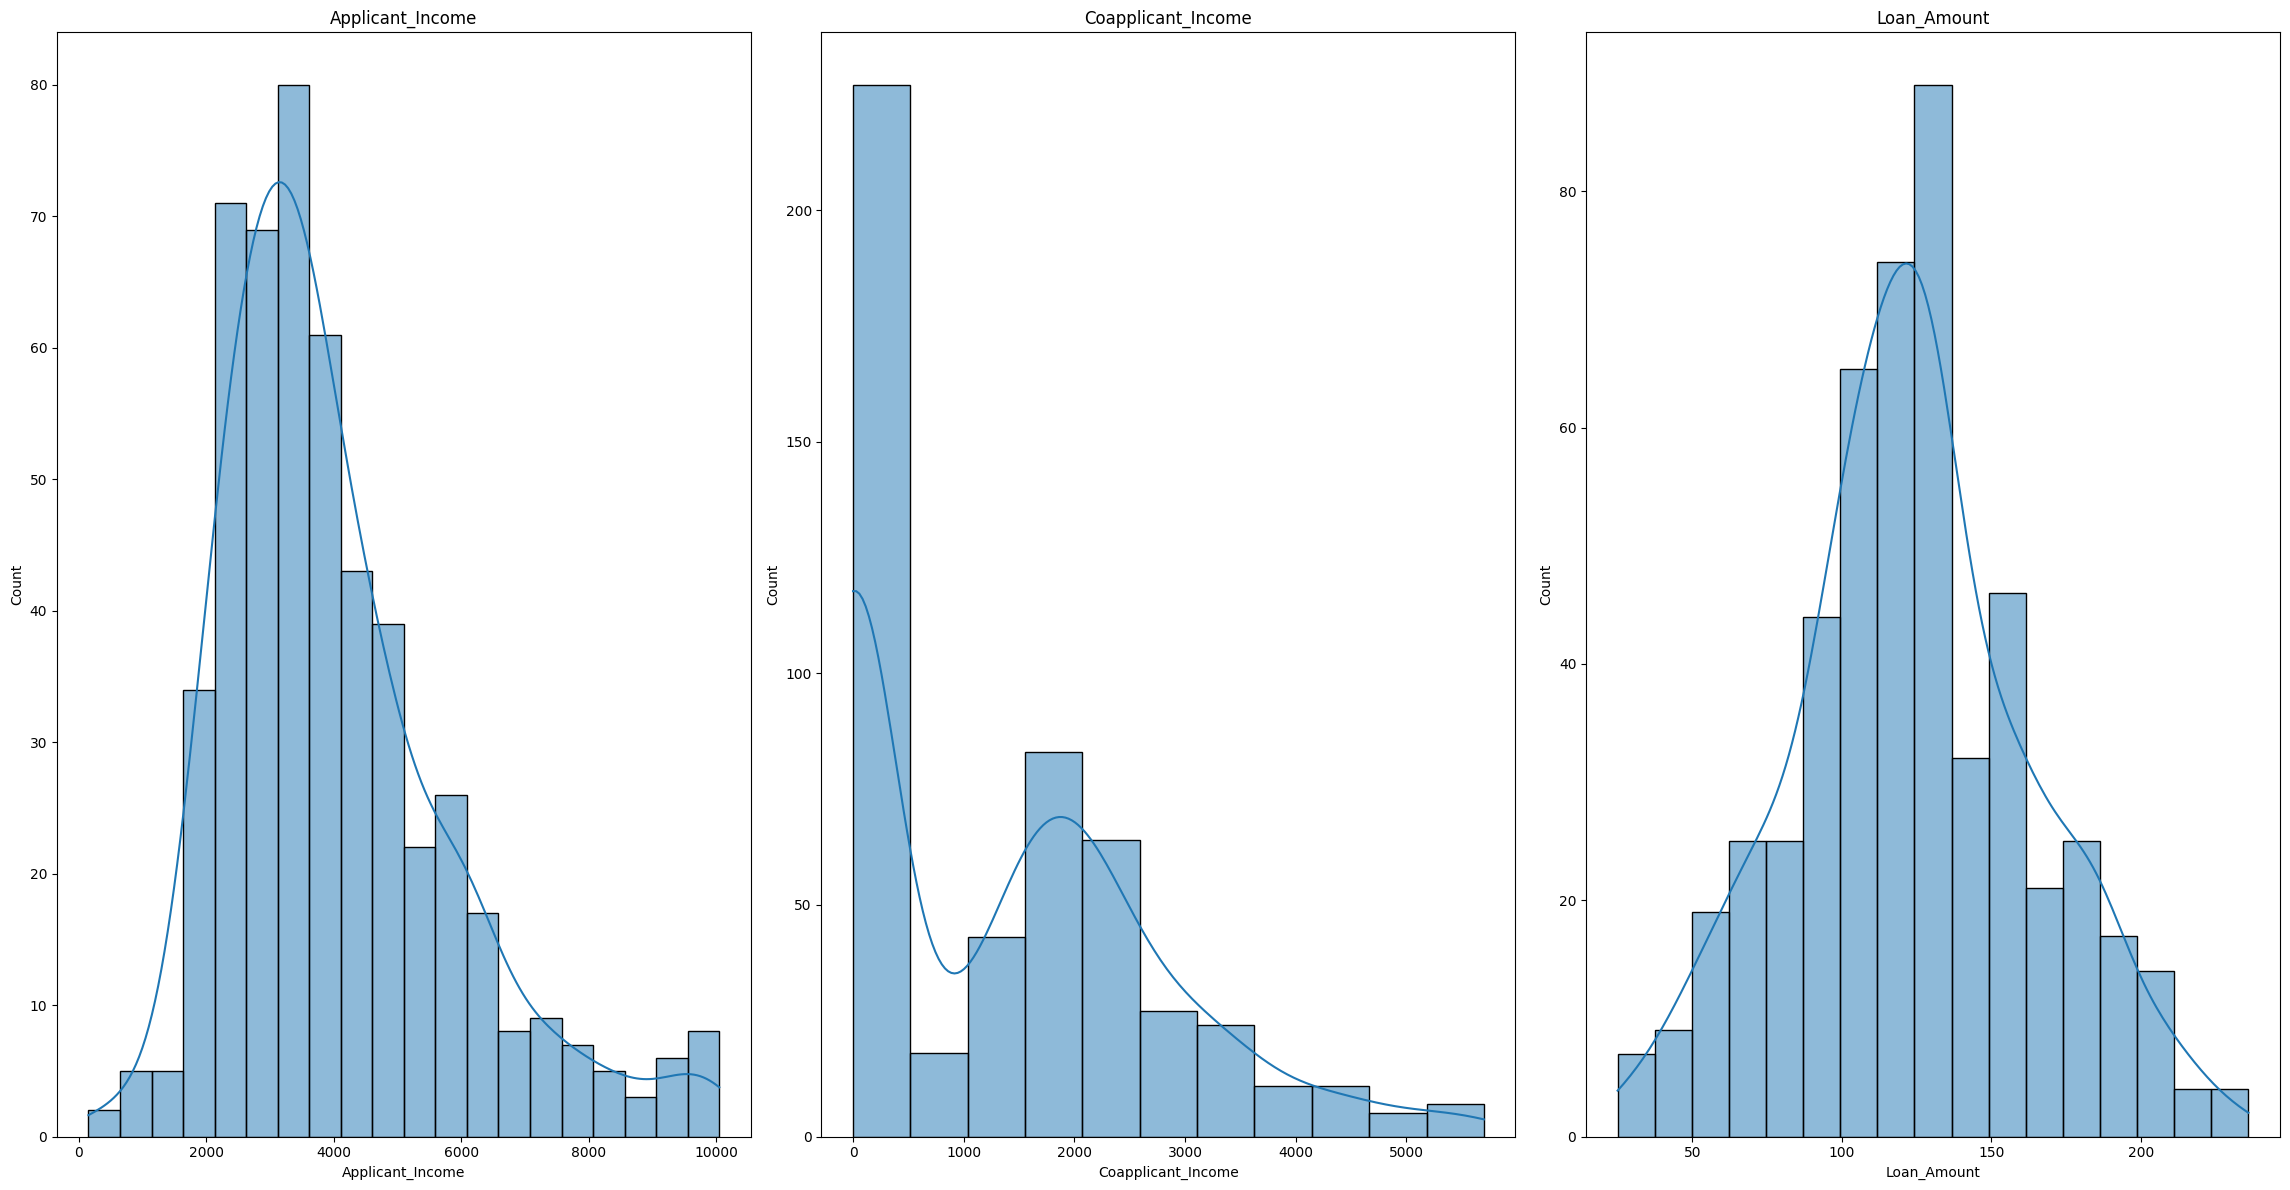

In [211]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=[23,12])
ax=ax.flatten()
index=0

col_displot_noOutlier = data_no_outlier[['Applicant_Income','Coapplicant_Income','Loan_Amount']]

for col,value in col_displot_noOutlier.items():
    sns.histplot(value, ax=ax[index], kde=True)
    ax[index].set_title(col)
    index+=1

plt.tight_layout()

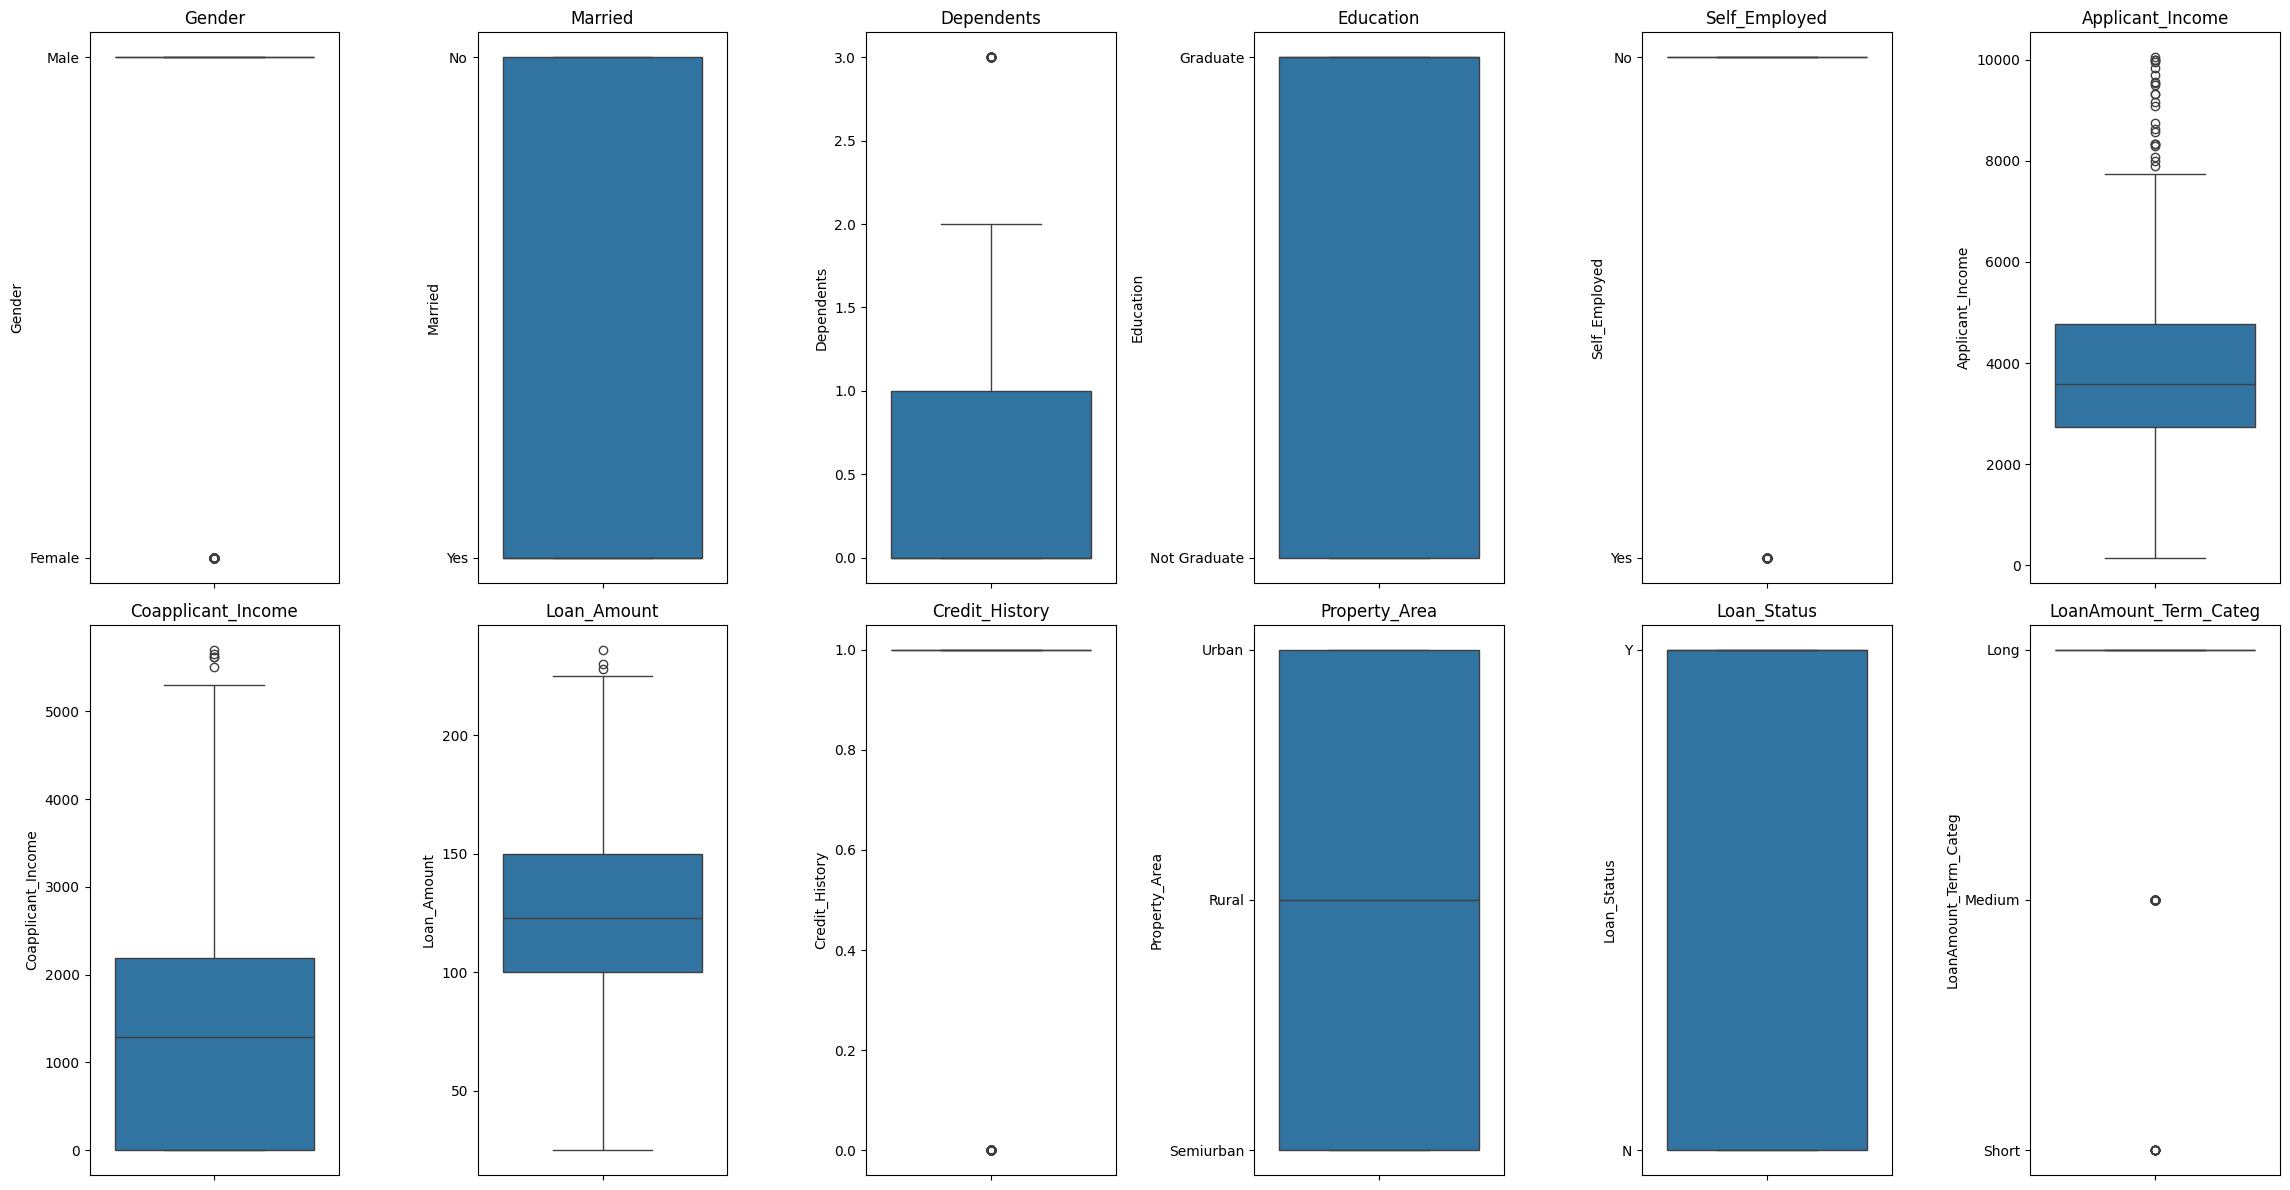

In [212]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=[23,12])
ax=ax.flatten()
index=0

for col in data_no_outlier.columns:
    sns.boxplot(data_no_outlier[col], ax=ax[index])
    ax[index].set_title(col)
    index+=1

plt.tight_layout()

<Axes: xlabel='Coapplicant_Income'>

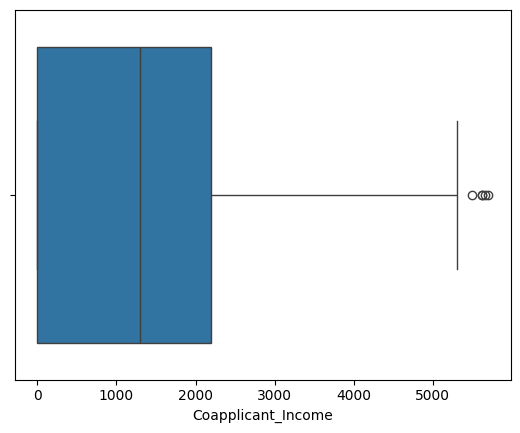

In [213]:
sns.boxplot(x='Coapplicant_Income', data = data_no_outlier)

In [214]:
(IQR(data_no_outlier,['Coapplicant_Income']))['Coapplicant_Income']

0         0.0
1      1508.0
2         0.0
3      2358.0
4         0.0
        ...  
608    1950.0
609       0.0
610       0.0
612       0.0
613       0.0
Name: Coapplicant_Income, Length: 515, dtype: float64

<Axes: xlabel='Coapplicant_Income'>

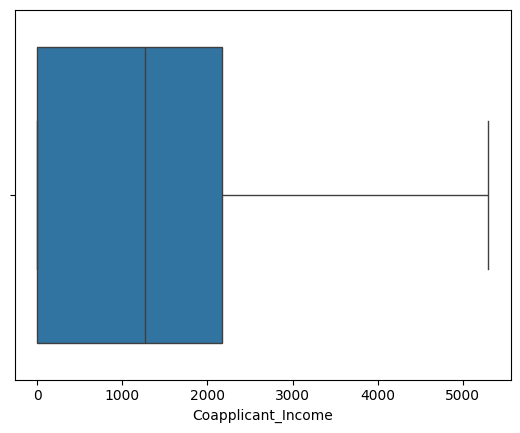

In [215]:
sns.boxplot(x='Coapplicant_Income',data=(IQR(data_no_outlier,['Coapplicant_Income'])))

In [216]:
data_no_outlier['Coapplicant_Income'].info()

<class 'pandas.core.series.Series'>
Index: 520 entries, 0 to 613
Series name: Coapplicant_Income
Non-Null Count  Dtype  
--------------  -----  
520 non-null    float64
dtypes: float64(1)
memory usage: 8.1 KB


In [217]:
IQR(data_no_outlier,['Coapplicant_Income']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 515 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 515 non-null    object 
 1   Married                515 non-null    object 
 2   Dependents             515 non-null    int64  
 3   Education              515 non-null    object 
 4   Self_Employed          515 non-null    object 
 5   Applicant_Income       515 non-null    int64  
 6   Coapplicant_Income     515 non-null    float64
 7   Loan_Amount            515 non-null    float64
 8   Credit_History         515 non-null    float64
 9   Property_Area          515 non-null    object 
 10  Loan_Status            515 non-null    object 
 11  LoanAmount_Term_Categ  515 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 52.3+ KB


### So, We can drop more outliers in the Coapplicant Columns as these are only 5 entries

In [218]:
data_no_outlier=IQR(data_no_outlier,['Coapplicant_Income'])

In [219]:
data_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 515 non-null    object 
 1   Married                515 non-null    object 
 2   Dependents             515 non-null    int64  
 3   Education              515 non-null    object 
 4   Self_Employed          515 non-null    object 
 5   Applicant_Income       515 non-null    int64  
 6   Coapplicant_Income     515 non-null    float64
 7   Loan_Amount            515 non-null    float64
 8   Credit_History         515 non-null    float64
 9   Property_Area          515 non-null    object 
 10  Loan_Status            515 non-null    object 
 11  LoanAmount_Term_Categ  515 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 52.3+ KB


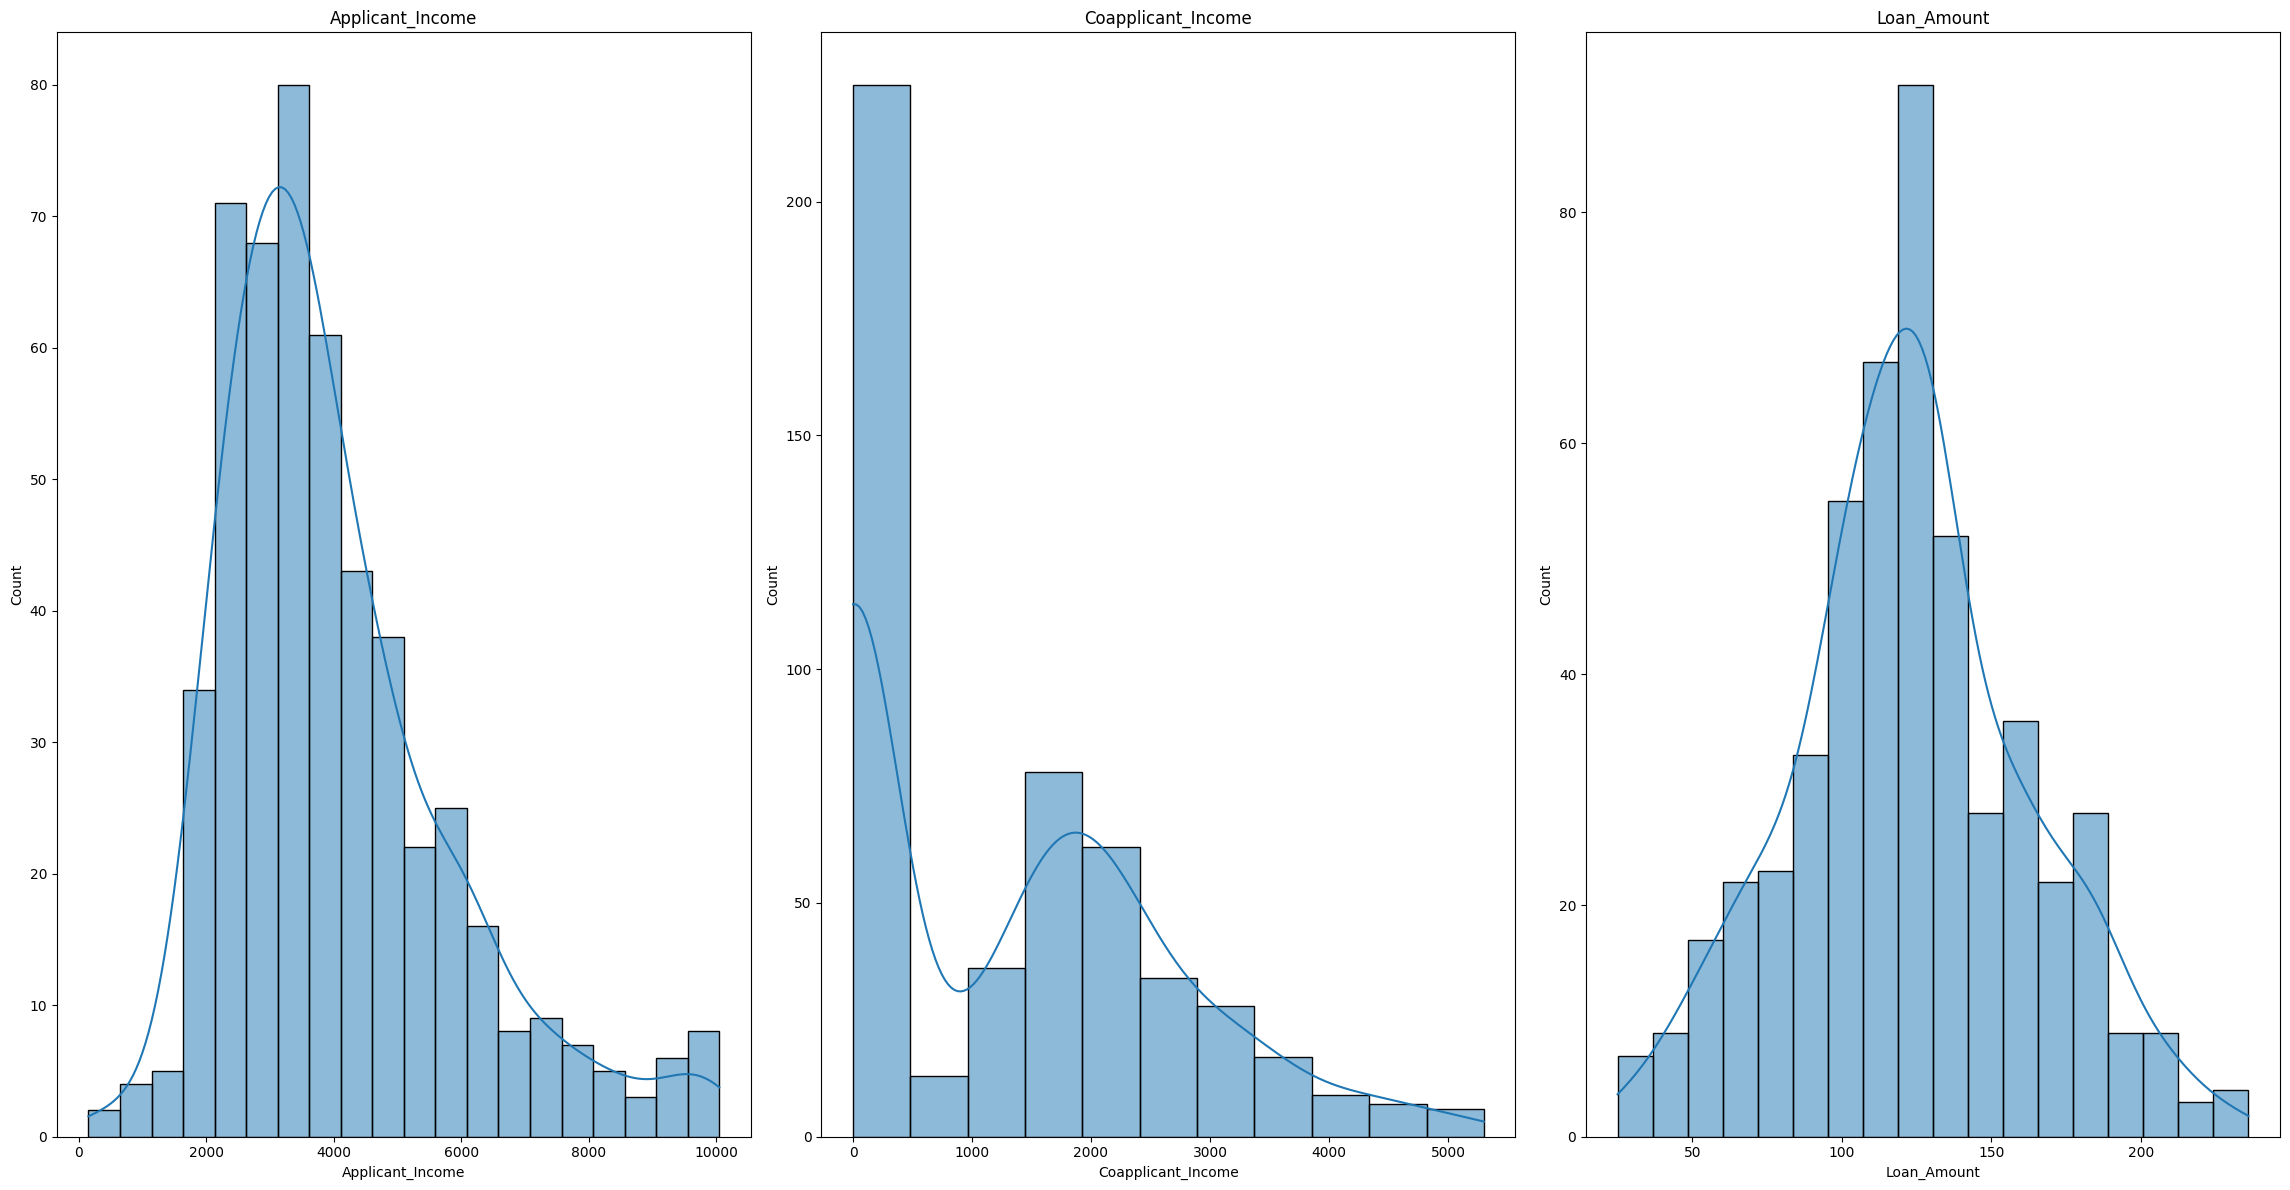

In [220]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=[23,12])
ax=ax.flatten()
index=0

col_displot_noOutlier = data_no_outlier[['Applicant_Income','Coapplicant_Income','Loan_Amount']]

for col,value in col_displot_noOutlier.items():
    sns.histplot(value, ax=ax[index], kde=True)
    ax[index].set_title(col)
    index+=1

plt.tight_layout()

In [221]:
data_no_outlier.describe()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History
count,515.000000,515.000000,515.000000,515.00000,515.000000
mean,0.732039,3994.099029,1275.799845,123.00000,0.850485
std,0.983345,1793.302479,1337.835861,39.32925,0.356942
min,0.000000,150.000000,0.000000,25.00000,0.000000
25%,0.000000,2723.000000,0.000000,99.50000,1.000000
50%,0.000000,3588.000000,1260.000000,122.00000,1.000000
75%,1.000000,4752.500000,2166.500000,147.00000,1.000000
max,3.000000,10047.000000,5302.000000,236.00000,1.000000


<Axes: ylabel='Applicant_Income'>

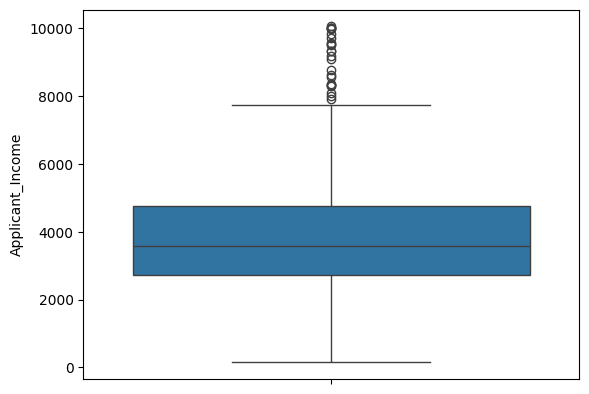

In [222]:
sns.boxplot(data_no_outlier['Applicant_Income'])

In [223]:
data_no_outlier['Applicant_Income'].info()

<class 'pandas.core.series.Series'>
Index: 515 entries, 0 to 613
Series name: Applicant_Income
Non-Null Count  Dtype
--------------  -----
515 non-null    int64
dtypes: int64(1)
memory usage: 8.0 KB


In [224]:
IQR(data_no_outlier,['Applicant_Income']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 491 non-null    object 
 1   Married                491 non-null    object 
 2   Dependents             491 non-null    int64  
 3   Education              491 non-null    object 
 4   Self_Employed          491 non-null    object 
 5   Applicant_Income       491 non-null    int64  
 6   Coapplicant_Income     491 non-null    float64
 7   Loan_Amount            491 non-null    float64
 8   Credit_History         491 non-null    float64
 9   Property_Area          491 non-null    object 
 10  Loan_Status            491 non-null    object 
 11  LoanAmount_Term_Categ  491 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 49.9+ KB


### Around 25 entries would be deleted to remove the outliers in the Applicant Income Column. Let's do this

In [225]:
data_no_outlier=IQR(data_no_outlier,['Applicant_Income'])

In [226]:
data_no_outlier.describe()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History
count,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.729124,3744.780041,1298.456049,120.558045,0.845214
std,0.984547,1418.317684,1330.012169,37.863317,0.362070
min,0.000000,150.000000,0.000000,25.000000,0.000000
25%,0.000000,2688.500000,0.000000,98.000000,1.000000
50%,0.000000,3497.000000,1302.000000,120.000000,1.000000
75%,1.000000,4603.000000,2167.500000,140.000000,1.000000
max,3.000000,7740.000000,5302.000000,236.000000,1.000000


In [227]:
data_no_outlier[data_no_outlier['Coapplicant_Income'] >4000].info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 76 to 603
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 19 non-null     object 
 1   Married                19 non-null     object 
 2   Dependents             19 non-null     int64  
 3   Education              19 non-null     object 
 4   Self_Employed          19 non-null     object 
 5   Applicant_Income       19 non-null     int64  
 6   Coapplicant_Income     19 non-null     float64
 7   Loan_Amount            19 non-null     float64
 8   Credit_History         19 non-null     float64
 9   Property_Area          19 non-null     object 
 10  Loan_Status            19 non-null     object 
 11  LoanAmount_Term_Categ  19 non-null     object 
dtypes: float64(3), int64(2), object(7)
memory usage: 1.9+ KB


### 19 more entries to be removed to remove outlier impact

In [228]:
data_no_outlier = data_no_outlier[data_no_outlier['Coapplicant_Income'] <= 4000]

In [229]:
data_no_outlier.describe()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History
count,472.000000,472.000000,472.000000,472.000000,472.000000
mean,0.741525,3741.375000,1166.198983,119.631356,0.845339
std,0.990899,1411.974655,1175.372734,37.582969,0.361965
min,0.000000,150.000000,0.000000,25.000000,0.000000
25%,0.000000,2698.750000,0.000000,97.750000,1.000000
50%,0.000000,3466.000000,1221.000000,120.000000,1.000000
75%,1.000000,4587.250000,2083.000000,139.000000,1.000000
max,3.000000,7740.000000,4000.000000,236.000000,1.000000


In [230]:
data_no_outlier

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History,Property_Area,Loan_Status,LoanAmount_Term_Categ
0,Male,No,0,Graduate,No,5849,0.0,128.0,1.0,Urban,Y,Long
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N,Long
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y,Long
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y,Long
4,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y,Long
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,1.0,Rural,Y,Long
609,Female,No,0,Graduate,No,2900,0.0,71.0,1.0,Rural,Y,Long
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,1.0,Rural,Y,Medium
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,1.0,Urban,Y,Long


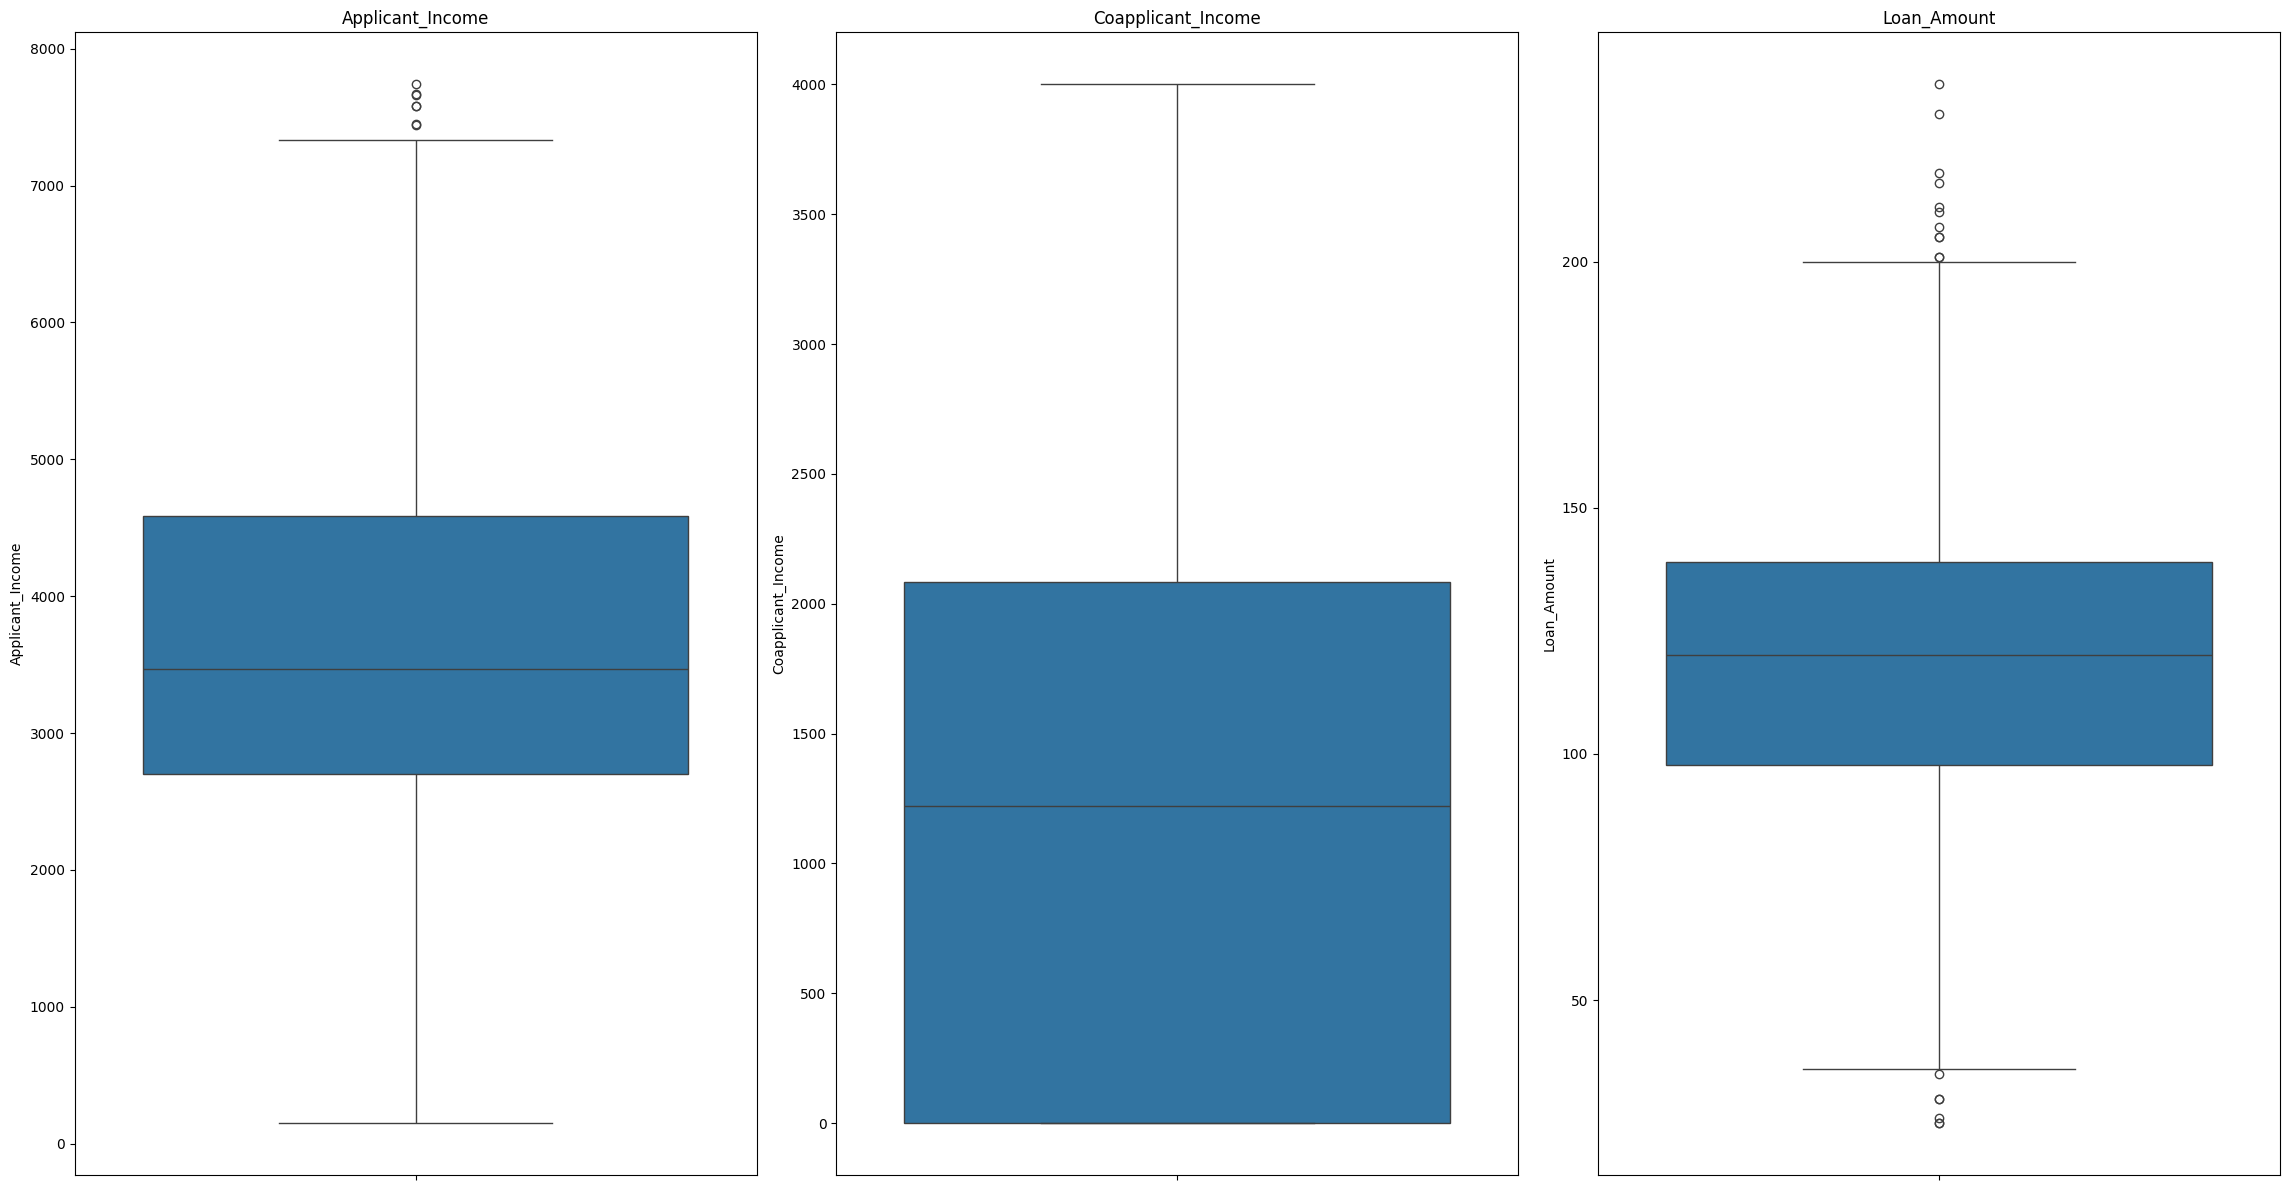

In [231]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=[23,12])
ax=ax.flatten()
index=0
outlier_col = data[['Applicant_Income','Coapplicant_Income','Loan_Amount']]

for col in outlier_col.columns:
    sns.boxplot(data_no_outlier[col], ax=ax[index])
    ax[index].set_title(col)
    index+=1

plt.tight_layout()

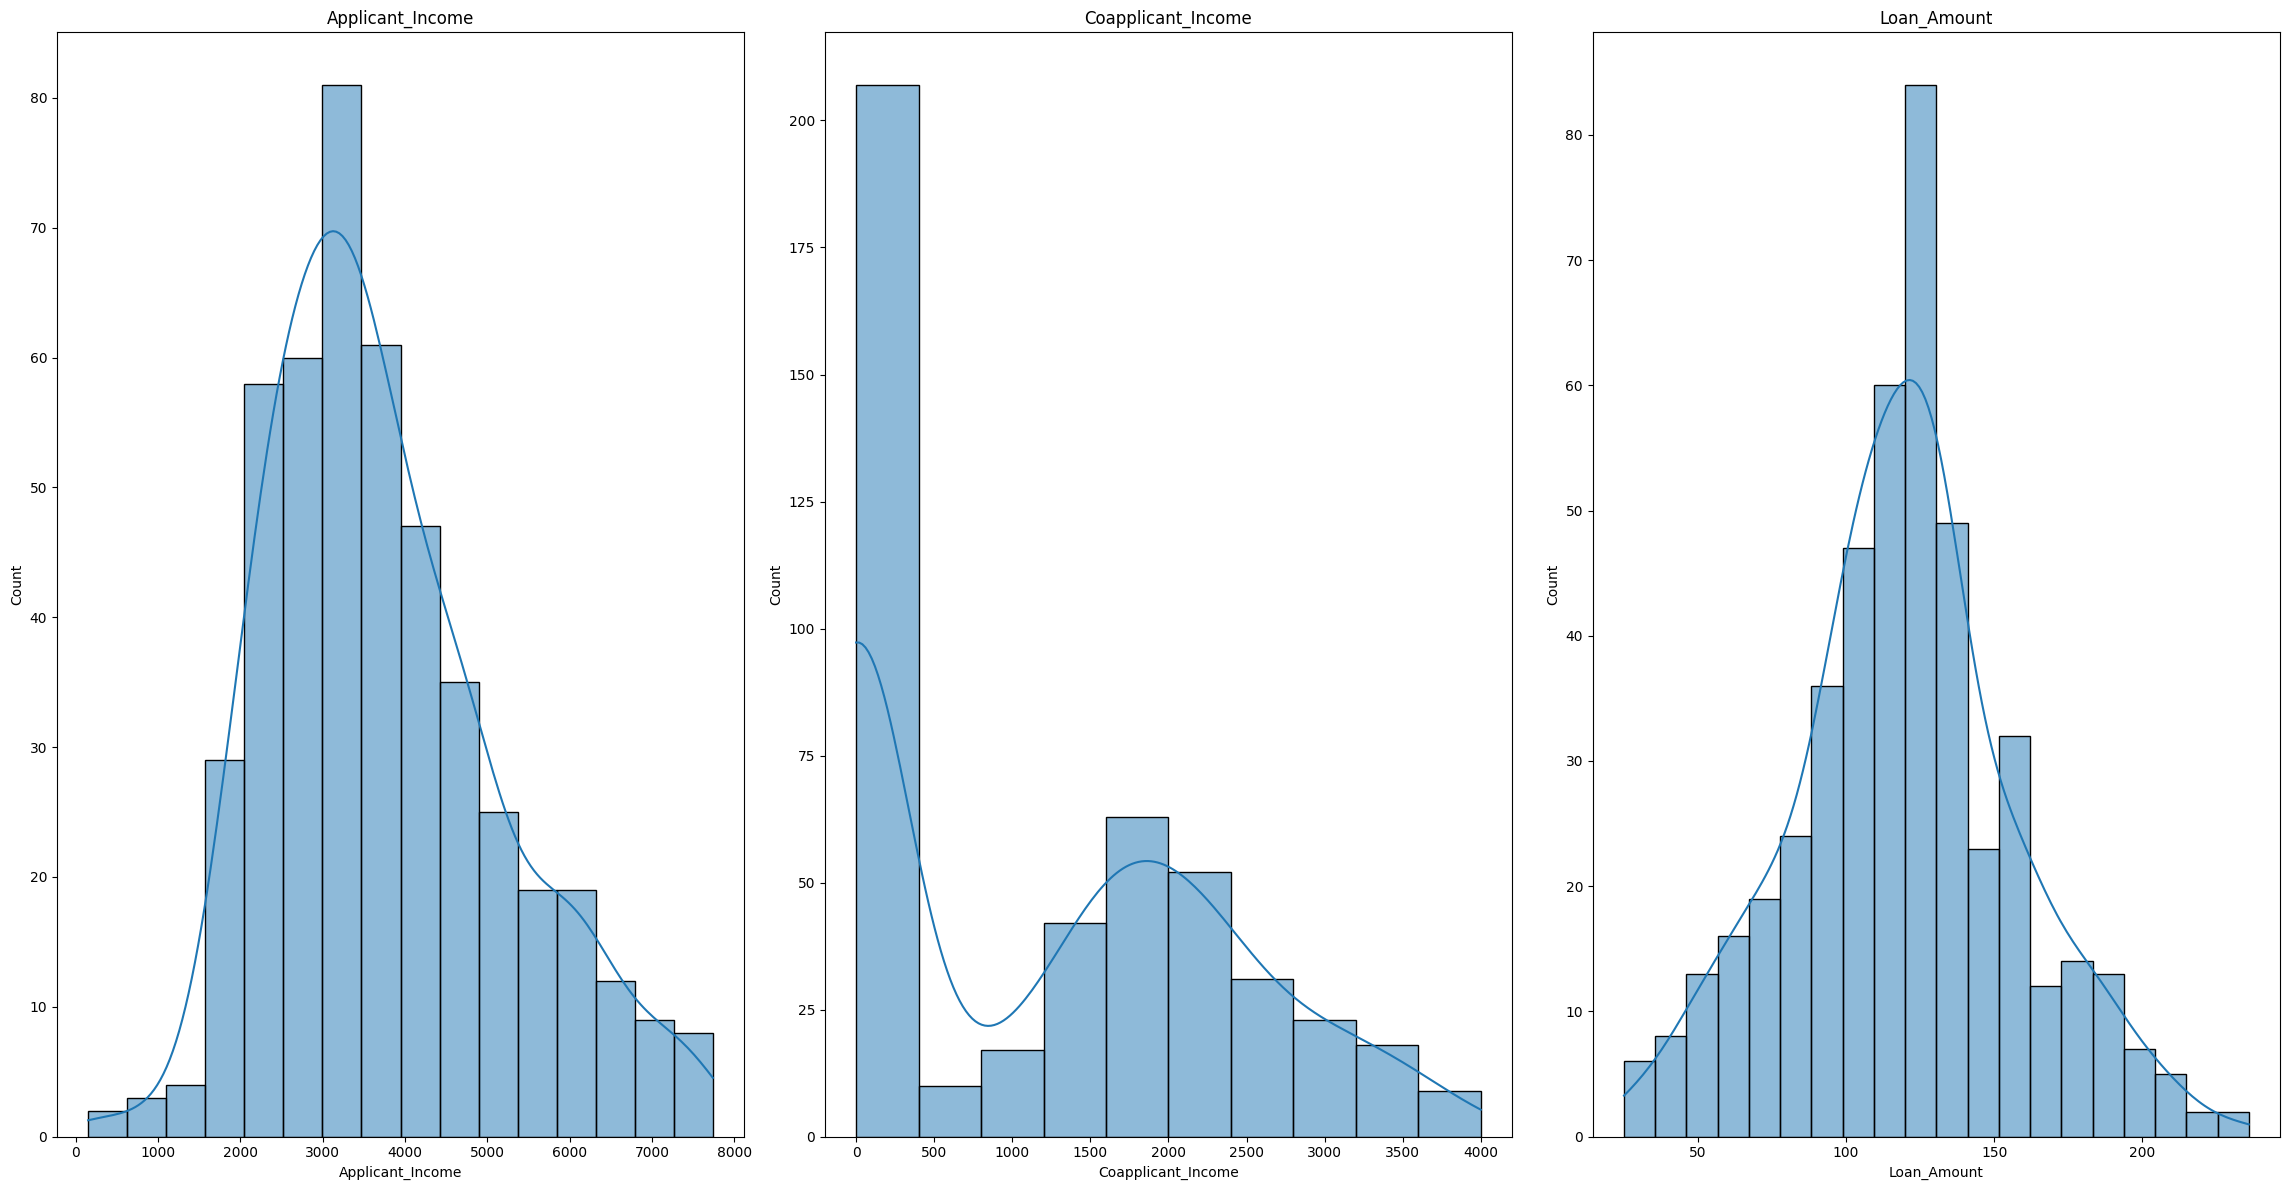

In [232]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=[23,12])
ax=ax.flatten()
index=0

col_displot_noOutlier = data_no_outlier[['Applicant_Income','Coapplicant_Income','Loan_Amount']]

for col,value in col_displot_noOutlier.items():
    sns.histplot(value, ax=ax[index], kde=True)
    ax[index].set_title(col)
    index+=1

plt.tight_layout()

In [233]:
data_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 472 non-null    object 
 1   Married                472 non-null    object 
 2   Dependents             472 non-null    int64  
 3   Education              472 non-null    object 
 4   Self_Employed          472 non-null    object 
 5   Applicant_Income       472 non-null    int64  
 6   Coapplicant_Income     472 non-null    float64
 7   Loan_Amount            472 non-null    float64
 8   Credit_History         472 non-null    float64
 9   Property_Area          472 non-null    object 
 10  Loan_Status            472 non-null    object 
 11  LoanAmount_Term_Categ  472 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 47.9+ KB


In [234]:
data_no_outlier.describe()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History
count,472.000000,472.000000,472.000000,472.000000,472.000000
mean,0.741525,3741.375000,1166.198983,119.631356,0.845339
std,0.990899,1411.974655,1175.372734,37.582969,0.361965
min,0.000000,150.000000,0.000000,25.000000,0.000000
25%,0.000000,2698.750000,0.000000,97.750000,1.000000
50%,0.000000,3466.000000,1221.000000,120.000000,1.000000
75%,1.000000,4587.250000,2083.000000,139.000000,1.000000
max,3.000000,7740.000000,4000.000000,236.000000,1.000000


In [235]:
backup_no_outlier = data_no_outlier.copy()

In [236]:
data_no_outlier.to_csv('Featured_Dataset.csv')

In [237]:
pd.read_csv('Dataset.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [238]:
data_no_outlier.tail(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History,Property_Area,Loan_Status,LoanAmount_Term_Categ
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,1.0,Rural,Y,Medium
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,1.0,Urban,Y,Long
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,0.0,Semiurban,N,Long


In [239]:
data_no_outlier.reset_index(drop=True,inplace=True)

In [240]:
data_no_outlier.tail(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History,Property_Area,Loan_Status,LoanAmount_Term_Categ
469,Male,Yes,3,Graduate,No,4106,0.0,40.0,1.0,Rural,Y,Medium
470,Male,Yes,2,Graduate,No,7583,0.0,187.0,1.0,Urban,Y,Long
471,Female,No,0,Graduate,Yes,4583,0.0,133.0,0.0,Semiurban,N,Long


In [241]:
backup_no_outlier = data_no_outlier.copy()

In [242]:
data_no_outlier.to_csv('Featured_Dataset.csv')

In [243]:
data_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 472 non-null    object 
 1   Married                472 non-null    object 
 2   Dependents             472 non-null    int64  
 3   Education              472 non-null    object 
 4   Self_Employed          472 non-null    object 
 5   Applicant_Income       472 non-null    int64  
 6   Coapplicant_Income     472 non-null    float64
 7   Loan_Amount            472 non-null    float64
 8   Credit_History         472 non-null    float64
 9   Property_Area          472 non-null    object 
 10  Loan_Status            472 non-null    object 
 11  LoanAmount_Term_Categ  472 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 44.4+ KB


In [244]:
data_no_outlier['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [245]:
corr = data_no_outlier.corr(numeric_only=True)
corr2 = data.corr(numeric_only=True)

Text(0.5, 1.0, 'Visual representation of the corelation of Numeric Columns')

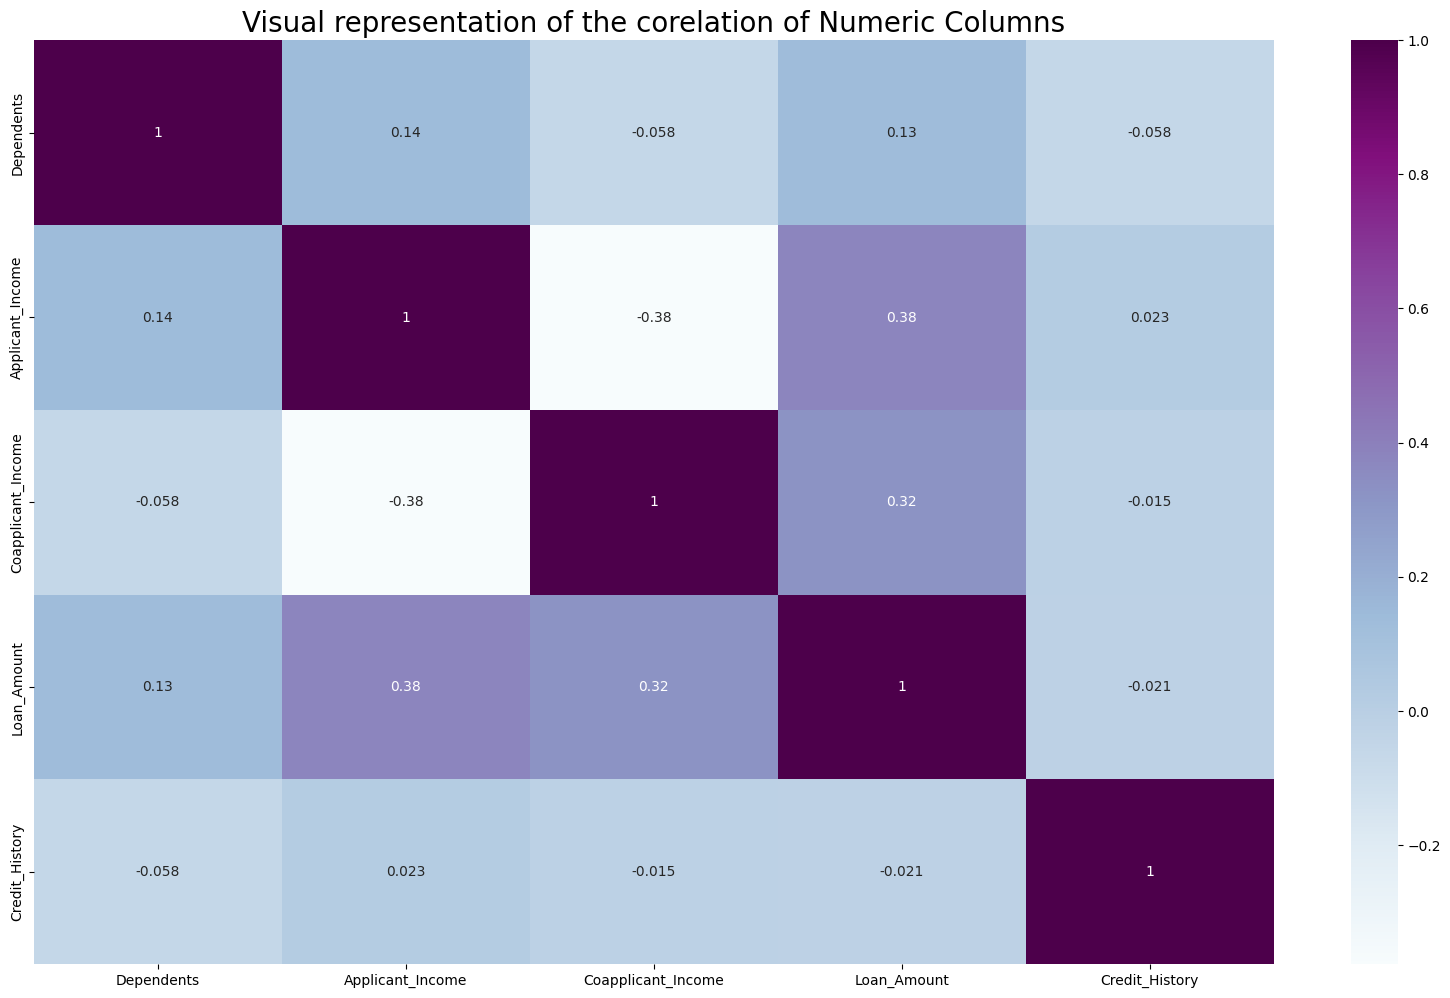

In [246]:
plt.figure(figsize=[20,12])
sns.heatmap(corr,annot=True, cmap='BuPu')
plt.title("Visual representation of the corelation of Numeric Columns",fontdict={'size':20,'color':'black'})

### Feature Engineering

#### As the coapplicant_Income column has lots of 0 values, we can create a new column that is the addition of both  Applicant column as well as Coapplicant column

<Axes: xlabel='Loan_Amount', ylabel='Applicant_Income'>

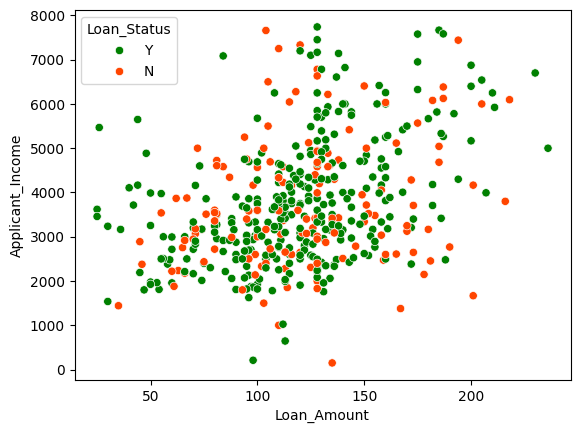

In [247]:
sns.scatterplot(x='Loan_Amount',y='Applicant_Income', data= data_no_outlier,
                hue='Loan_Status', palette=['green','orangered'])

<Axes: xlabel='Loan_Amount', ylabel='Coapplicant_Income'>

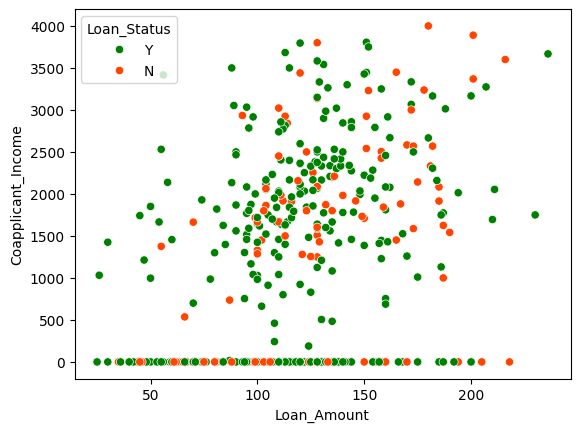

In [248]:
sns.scatterplot(x='Loan_Amount',y='Coapplicant_Income', data= data_no_outlier,
                hue='Loan_Status', palette=['green','orangered'])

In [249]:
data_no_outlier['Applicant_Income'] = backup_no_outlier['Applicant_Income']

In [250]:
data_no_outlier['Total_Income'] = data_no_outlier['Applicant_Income'] + data_no_outlier['Coapplicant_Income']

In [251]:
data_no_outlier.drop(columns=['Applicant_Income','Coapplicant_Income'],inplace=True)

<Axes: xlabel='Loan_Amount', ylabel='Total_Income'>

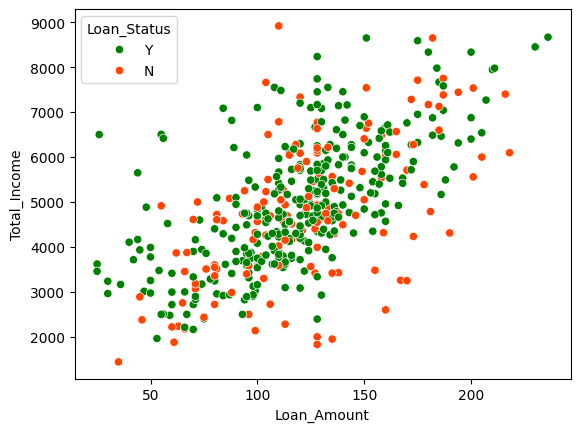

In [252]:
sns.scatterplot(x='Loan_Amount',y='Total_Income', data= data_no_outlier,
                hue='Loan_Status', palette=['green','orangered'])

In [253]:
data_no_outlier.describe()

,Dependents,Loan_Amount,Credit_History,Total_Income
count,472.000000,472.000000,472.000000,472.000000
mean,0.741525,119.631356,0.845339,4907.573983
std,0.990899,37.582969,0.361965,1456.798509
min,0.000000,25.000000,0.000000,1442.000000
25%,0.000000,97.750000,1.000000,3794.500000
50%,0.000000,120.000000,1.000000,4752.500000
75%,1.000000,139.000000,1.000000,5908.750000
max,3.000000,236.000000,1.000000,8917.000000


#### As we can see above the loan_Amount column and the Total_Income column have large ranges compared to other columns, so we will nirmalise these two columns, so that the values in these columns will be in a smaller range that will help to generalise the model more accurately...

### We will use Log transformation technique for Normalisation



In [254]:
# This code chnaged the argument column as well

# def log_trans(df,col):
#    df[col] = np.log(df[col]+1)
#    return df[col]   


# This is right

def log_trans(df,col):
    return np.log(df[col]+1)

In [255]:
data_no_outlier['Loan_Amount_Norm']= log_trans(data_no_outlier,'Loan_Amount')
data_no_outlier['Total_Income_Norm']= log_trans(data_no_outlier,'Total_Income')

<Axes: xlabel='Loan_Amount', ylabel='Density'>

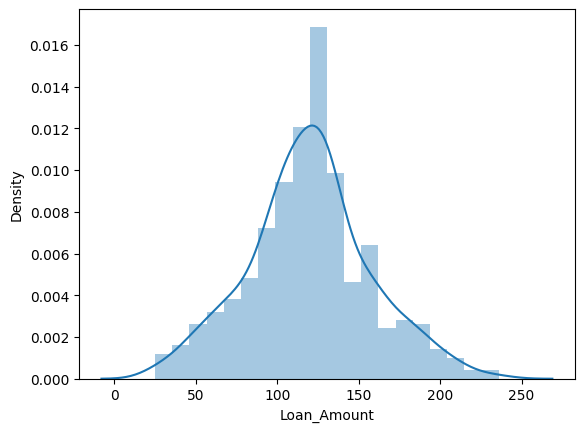

In [256]:
sns.distplot(data_no_outlier['Loan_Amount'])

<Axes: xlabel='Loan_Amount_Norm', ylabel='Density'>

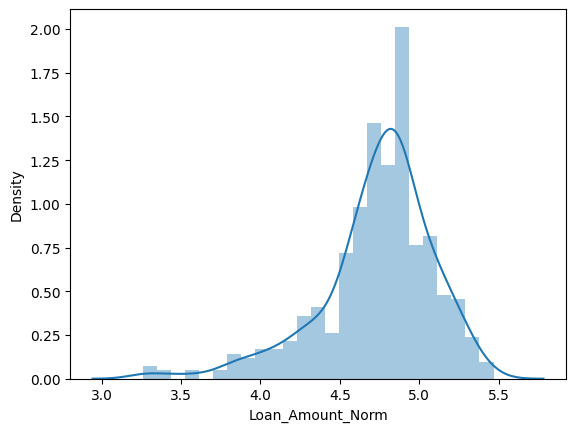

In [257]:
sns.distplot(data_no_outlier['Loan_Amount_Norm'])

<Axes: xlabel='Total_Income', ylabel='Density'>

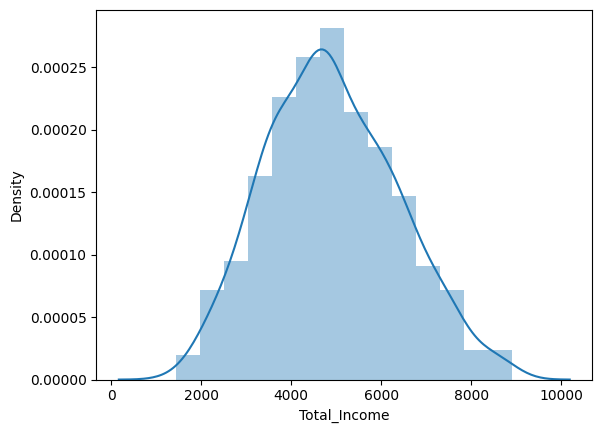

In [258]:
sns.distplot(data_no_outlier['Total_Income'])

<Axes: xlabel='Total_Income_Norm', ylabel='Density'>

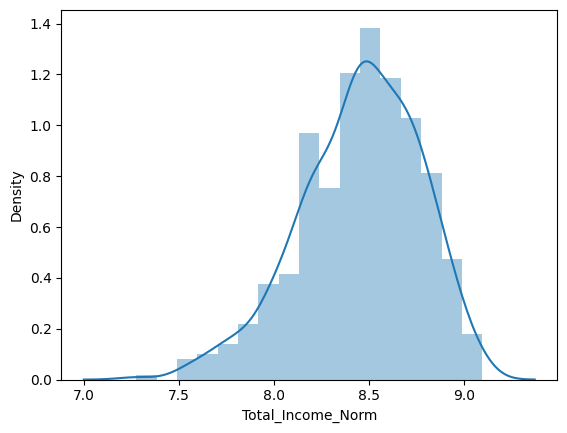

In [259]:
sns.distplot(data_no_outlier['Total_Income_Norm'])

#### Time to drop old columns

In [260]:
data_no_outlier.drop(columns = ['Total_Income','Loan_Amount'], inplace=True)

### Encoding

In [261]:
from sklearn.preprocessing import LabelEncoder

#### We used Label Encoding technique because all of the categorical columns are of Nominal type not Ordinal

In [262]:
data_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 472 non-null    object 
 1   Married                472 non-null    object 
 2   Dependents             472 non-null    int64  
 3   Education              472 non-null    object 
 4   Self_Employed          472 non-null    object 
 5   Credit_History         472 non-null    float64
 6   Property_Area          472 non-null    object 
 7   Loan_Status            472 non-null    object 
 8   LoanAmount_Term_Categ  472 non-null    object 
 9   Loan_Amount_Norm       472 non-null    float64
 10  Total_Income_Norm      472 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 40.7+ KB


In [263]:
col_cat = ['Gender','Married','Education','Self_Employed','Property_Area','LoanAmount_Term_Categ']

In [264]:
le = LabelEncoder()

In [265]:
data_no_outlier.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_Term_Categ,Loan_Amount_Norm,Total_Income_Norm
0,Male,No,0,Graduate,No,1.0,Urban,Y,Long,4.859812,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,Long,4.859812,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,Long,4.204693,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,Long,4.795791,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,Long,4.955827,8.699681


In [266]:
for col in col_cat:
    data_no_outlier[col] = le.fit_transform(data_no_outlier[col])

In [267]:
data_no_outlier.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_Term_Categ,Loan_Amount_Norm,Total_Income_Norm
0,1,0,0,0,0,1.0,2,Y,0,4.859812,8.674197
1,1,1,1,0,0,1.0,0,N,0,4.859812,8.714732
2,1,1,0,0,1,1.0,2,Y,0,4.204693,8.006701
3,1,1,0,1,0,1.0,2,Y,0,4.795791,8.505525
4,1,0,0,0,0,1.0,2,Y,0,4.955827,8.699681


In [268]:
data_no_outlier['Loan_Status']=data_no_outlier['Loan_Status'].map({'Y':1,'N':0})

In [269]:
data_no_outlier.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_Term_Categ,Loan_Amount_Norm,Total_Income_Norm
0,1,0,0,0,0,1.0,2,1,0,4.859812,8.674197
1,1,1,1,0,0,1.0,0,0,0,4.859812,8.714732
2,1,1,0,0,1,1.0,2,1,0,4.204693,8.006701
3,1,1,0,1,0,1.0,2,1,0,4.795791,8.505525
4,1,0,0,0,0,1.0,2,1,0,4.955827,8.699681


In [270]:
data_no_outlier.dtypes

Gender                     int64
Married                    int64
Dependents                 int64
Education                  int64
Self_Employed              int64
Credit_History           float64
Property_Area              int64
Loan_Status                int64
LoanAmount_Term_Categ      int64
Loan_Amount_Norm         float64
Total_Income_Norm        float64
dtype: object

#### All of the datatypes of the Columns are Numerical Now... Best for the Model 

In [271]:
from sklearn.preprocessing import StandardScaler

In [272]:
std = StandardScaler()

### We will skip the Standardization for now, may be model evaluation, we will check the model accuracy after standardization

#### Splitting the data

In [273]:
X = data_no_outlier.drop(columns=['Loan_Status'])
y = data_no_outlier['Loan_Status']

In [274]:
data_no_outlier.shape, X.shape, y.shape

((472, 11), (472, 10), (472,))

In [275]:
from sklearn.model_selection import train_test_split

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

#### Logistic Regression

In [277]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [278]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

In [279]:
accuracy*100

86.31578947368422

In [280]:
from sklearn.model_selection import cross_val_score

In [281]:
score = cross_val_score(lr, X, y, cv=10)
print(f"Average Logistic Regression Accuracy: {np.mean(score)*100}")

Average Logistic Regression Accuracy: 82.41134751773049


#### Decision Tree

In [282]:
from sklearn.tree import DecisionTreeClassifier

In [283]:
dtr = DecisionTreeClassifier()
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy*100

77.89473684210526

In [284]:
score = cross_val_score(dtr, X, y, cv=10)
print(f"Average Decision Tree Accuracy: {np.mean(score)*100}")

Average Decision Tree Accuracy: 72.45124113475178


#### Random Forest

In [285]:
from sklearn.ensemble import RandomForestClassifier

In [286]:
rft = RandomForestClassifier()
rft.fit(X_train,y_train)
y_pred = rft.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy*100

86.31578947368422

In [287]:
score = cross_val_score(rft, X, y, cv=10)
print(f"Average Random Forest Accuracy: {np.mean(score)*100}")

Average Random Forest Accuracy: 80.51418439716313


### So, we got the highest accuracy score from Logistic Regression model with Accuracy score = 82.41

#### Now let's see if we do Standardization of the numerical values, will it improve or degrade the performance of the model

In [288]:
X_train_scl = std.fit_transform(X_train)
X_test_scl = std.transform(X_test)

In [289]:
lr = LogisticRegression()
lr.fit(X_train_scl,y_train)
y_pred = lr.predict(X_test_scl)
accuracy = accuracy_score(y_test,y_pred)
accuracy*100

86.31578947368422

#### Now if i need to check the cross val, i need to make pipeline

In [290]:
from sklearn.pipeline import make_pipeline

In [291]:
pipe = make_pipeline(StandardScaler(),LogisticRegression())
score = cross_val_score(pipe, X, y, cv=10)
print(f"Average Logistic Regression Accuracy: {np.mean(score)*100}")

Average Logistic Regression Accuracy: 82.62411347517731


#### We did not get much improvement by standardizing the data in case of LOGISTIC REGRESSION

#### Decision Tree

In [292]:
dtr = DecisionTreeClassifier()
dtr.fit(X_train_scl,y_train)
y_pred = dtr.predict(X_test_scl)
accuracy = accuracy_score(y_test,y_pred)
accuracy*100

74.73684210526315

In [293]:
pipe = make_pipeline(StandardScaler(),DecisionTreeClassifier())
score = cross_val_score(pipe, X, y, cv=10)
print(f"Average Logistic Regression Accuracy: {np.mean(score)*100}")

Average Logistic Regression Accuracy: 71.59574468085107


#### Random Forest

In [294]:
rft = RandomForestClassifier()
rft.fit(X_train_scl,y_train)
y_pred = rft.predict(X_test_scl)
accuracy = accuracy_score(y_test,y_pred)
accuracy*100

89.47368421052632

In [295]:
pipe = make_pipeline(StandardScaler(),RandomForestClassifier())
score = cross_val_score(pipe, X, y, cv=10)
print(f"Average Logistic Regression Accuracy: {np.mean(score)*100}")

Average Logistic Regression Accuracy: 81.9991134751773


#### We can see a little imrovement when we use standardization in case of Decision Tree. 
### But Logistic Regression has the overall best performance... with Accuracy Score: 82.41



In [296]:
data_no_outlier['Loan_Status'].value_counts()

Loan_Status
1    326
0    146
Name: count, dtype: int64

In [297]:
lr = LogisticRegression()
lr.fit(X_train_scl,y_train)
y_pred = lr.predict(X_test_scl)
accuracy = accuracy_score(y_test,y_pred)
pipe = make_pipeline(StandardScaler(),LogisticRegression())
score = cross_val_score(pipe, X, y, cv=10)
print(f"Average Logistic Regression Accuracy: {np.mean(score)*100}")

Average Logistic Regression Accuracy: 82.62411347517731


In [298]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15 13]
 [ 0 67]]
              precision    recall  f1-score   support

           0       1.00      0.54      0.70        28
           1       0.84      1.00      0.91        67

    accuracy                           0.86        95
   macro avg       0.92      0.77      0.80        95
weighted avg       0.89      0.86      0.85        95



#### We can see the Recall in case of Loan_Aproval: No is very low, so it means model is biased towards the recall of       predicting the Loan Aproval: Yes. This is because of the imbalance of dataset as No values is almost half of Yes values...

In [299]:
from imblearn.over_sampling import SMOTE

In [300]:
smt = SMOTE(random_state = 20)

In [301]:
X_train_scl, y_train = smt.fit_resample(X_train_scl,y_train)
lr.fit(X_train_scl,y_train)
y_pred=lr.predict(X_test_scl)

In [302]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69        28
           1       0.86      0.91      0.88        67

    accuracy                           0.83        95
   macro avg       0.80      0.78      0.79        95
weighted avg       0.83      0.83      0.83        95



In [303]:
X_train_scl, y_train = smt.fit_resample(X_train_scl,y_train)
dtr.fit(X_train_scl,y_train)
y_pred=dtr.predict(X_test_scl)

In [304]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64        28
           1       0.86      0.82      0.84        67

    accuracy                           0.78        95
   macro avg       0.74      0.75      0.74        95
weighted avg       0.79      0.78      0.78        95



In [305]:
X_train_scl, y_train = smt.fit_resample(X_train_scl,y_train)
rft.fit(X_train_scl,y_train)
y_pred=rft.predict(X_test_scl)

In [306]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.61      0.69        28
           1       0.85      0.94      0.89        67

    accuracy                           0.84        95
   macro avg       0.83      0.77      0.79        95
weighted avg       0.84      0.84      0.83        95



#### As we can see Random Forest Model gave the overall good performance in both precision and recall of both 1 and 0 and is not biased to any one of them... So let's keep it for now... and see what can be done further to improve the performance.